In [1]:
from sympy import Symbol, init_printing, conjugate, sin, cos, factor, Matrix
from sympy import lambdify, Symbol, symbols, block_collapse, sqrt, eye, solve
from sympy.physics.quantum import Dagger
init_printing()

In [2]:
from diagram_v2 import all_diagrams


--- Calculating H10 Interactions ---

--- Calculating Z1 Interactions ---

--- Defining Lepton Interactions with charged fields ---

Refactored script execution finished.


INFO: --- Creating Diagram: triangle_ni_GLp_GLm (FSS) ---
INFO: Vertex 1 ({{H_1^0}}-{{G_L^+}}-{{G_L^-}}) coupling found: -\alpha_{13}**2*k_1/\rho_1 + 4*\lambda_{12}*k_1
INFO: Vertex 2 ({{G_L^+}}-\overline{n}[i]-\ell[b]) coupling found: L=-sqrt(2)*T_{RL}[i, b]/k_1, R=sqrt(2)*conjugate(Q_L[b, i])*m_\ell[b]/k_1
INFO: Vertex 3 ({{G_L^-}}-\overline{\ell}[a]-n[i]) coupling found: L=sqrt(2)*Q_L[a, i]*m_\ell[a]/k_1, R=-sqrt(2)*conjugate(T_{RL}[i, a])/k_1
INFO: Mass List for TriangleFSS: [m_{H_1^0}, m_\ell[a], m_\ell[b], mn[i], m_{W_1}, m_{W_1}]
INFO: Successfully created triangle_ni_GLp_GLm (FSS)
INFO: --- Creating Diagram: triangle_ni_GRp_GRm (FSS) ---
INFO: Vertex 1 ({{H_1^0}}-{{G_R^+}}-{{G_R^-}}) coupling found: -\alpha_{13}**2*k_1**3/(\rho_1*v_R**2) + 4*\lambda_{12}*k_1**3/v_R**2
INFO: Vertex 2 ({{G_R^+}}-\overline{n}[i]-\ell[b]) coupling found: L=-sqrt(2)*conjugate(Q_R[b, i])*m_\ell[b]/v_R, R=sqrt(2)*conjugate(J[b, i])/v_R
INFO: Vertex 3 ({{G_R^-}}-\overline{\ell}[a]-n[i]) coupling found:

28 diagrams created and stored in all_diagrams dictionary.


In [3]:
list(all_diagrams.keys())

['ni_GLp_GLm',
 'ni_GRp_GRm',
 'ni_HRp_HRm',
 'ni_GRp_HRm',
 'ni_HRp_GRm',
 'ni_W1p_W1m',
 'ni_W2p_W2m',
 'ni_W1p_GLm',
 'ni_W2p_GRm',
 'ni_W2p_HRm',
 'ni_GLp_W1m',
 'ni_GRp_W2m',
 'ni_HRp_W2m',
 'ni_W1',
 'ni_W2',
 'W1_ni',
 'W2_ni',
 'ni_GL',
 'ni_GR',
 'ni_HR',
 'GL_ni',
 'GR_ni',
 'HR_ni',
 'GL_ninj',
 'GR_ninj',
 'HR_ninj',
 'W1_ninj',
 'W2_ninj']

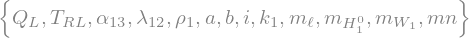

In [4]:
all_diagrams['ni_GLp_GLm'].AL().atoms(Symbol)

In [5]:
freesymbols = set()
for interaction, diagram in all_diagrams.items():
    freesymbols |= diagram.AL().atoms(Symbol)

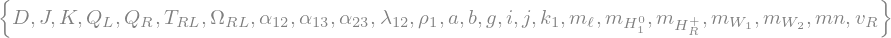

In [6]:
freesymbols

We have the following definitions
$$
Q_{L}^{\dagger} = U_{L}^{\dagger}V_{L}^{\ell}\\
Q_{R}^{\dagger} = U_{R}^{\top}V_{R}^{\ell}
$$
in the case of $V_{L}^{\ell} = V_{R}^{\ell} = \mathbf{I}$, we have

$$
Q_{L}^{\dagger} = U_{L}^{\dagger}\\
Q_{R}^{\dagger} = U_{R}^{\top}
$$

In [7]:
from DLRSM1.block_diagonalization_iss_new import U, U_approx4, Unu, mD, M, I3, mu
from DLRSM1.potential_senjanovic_HiggsDoublets import rho1, k1, vR, alpha13, alpha12, alpha23, lamb12, mHR, mH10
from DLRSM1.Gauge_Higgs_senjanovic_HiggsDoublets import mW1, mW2, g

In [8]:
M.shape

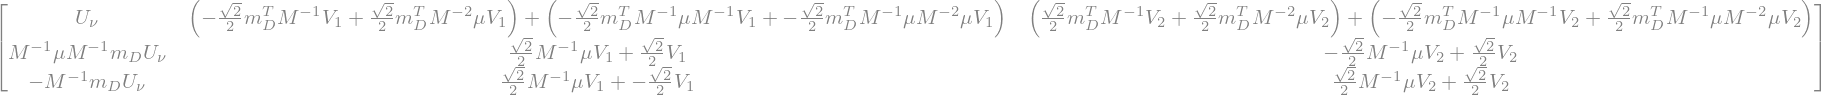

In [9]:
U

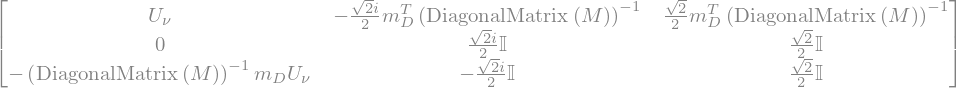

In [10]:
U_approx4

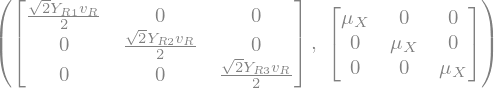

In [11]:
YR1, YR2, YR3 = symbols('Y_{R1} Y_{R2} Y_{R3}', positive=True)
MR1 = YR1*vR/sqrt(2)
MR2 = YR2*vR/sqrt(2)
MR3 = YR3*vR/sqrt(2)
muX = symbols(r'\mu_X', positive=True)
eye3 = eye(3)
Mu = muX*eye3
MM = Matrix(
    [
        [MR1, 0, 0],
        [0, MR2, 0],
        [0, 0, MR3]
    ]
)
MM, Mu

In [12]:
Mdiag = MM*Mu.inv()*MM

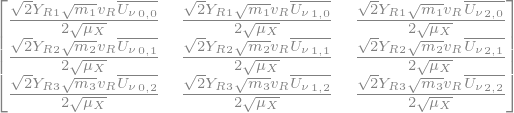

In [13]:
m1, m2, m3 = symbols('m_{1} m_{2} m_{3}', positive=True)
mnu = Matrix(
    [
        [m1, 0, 0],
        [0, m2, 0],
        [0, 0, m3]
    ]
)
mD_CI = (Mdiag.applyfunc(sqrt)*mnu.applyfunc(sqrt)*Dagger(Unu.as_explicit()))
mD_CI

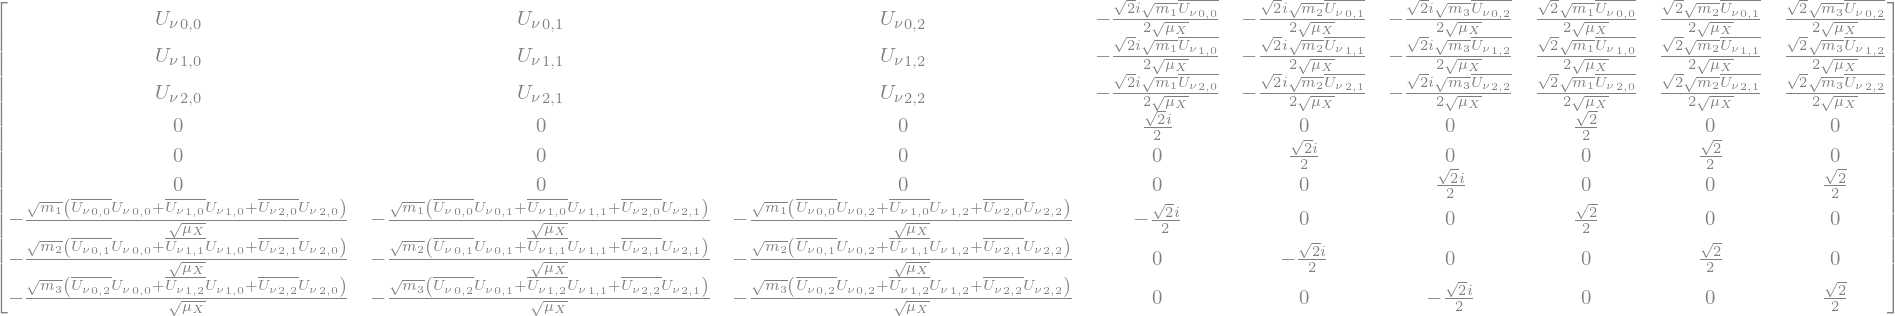

In [14]:
U_approx5 = U_approx4.as_explicit().subs(
    {mD[i,j]: mD_CI[i,j] for i in range(3) for j in range(3)}
).applyfunc(lambda x:x.factor()).subs(
    {M[i,j]:MM[i,j] for i in range(3) for j in range(3)},
).subs(
    {mu[i,j]:Mu[i,j] for i in range(3) for j in range(3)}
)
U_approx5

In [15]:
UnuDaggerUnu = block_collapse(Dagger(Unu)*Unu).as_explicit()
UnuUnuDagger = block_collapse(Unu*Dagger(Unu)).as_explicit()

unitarity_conditions_UnuDaggerUnu = {
    UnuDaggerUnu[0,0]: 1,
    UnuDaggerUnu[1,1]: 1,
    UnuDaggerUnu[2,2]: 1,
    UnuDaggerUnu[0,1]: 0,
    UnuDaggerUnu[0,2]: 0,
    UnuDaggerUnu[1,0]: 0,
    UnuDaggerUnu[1,2]: 0,
    UnuDaggerUnu[2,0]: 0,
    UnuDaggerUnu[2,1]: 0
}

unitarity_conditions_UnuUnuDagger = {
    UnuUnuDagger[0,0]: 1,
    UnuUnuDagger[1,1]: 1,
    UnuUnuDagger[2,2]: 1,
    UnuUnuDagger[0,1]: 0,
    UnuUnuDagger[0,2]: 0,
    UnuUnuDagger[1,0]: 0,
    UnuUnuDagger[1,2]: 0,
    UnuUnuDagger[2,0]: 0,
    UnuUnuDagger[2,1]: 0
}

In [16]:
unitarity_conditions_UnuDaggerUnu

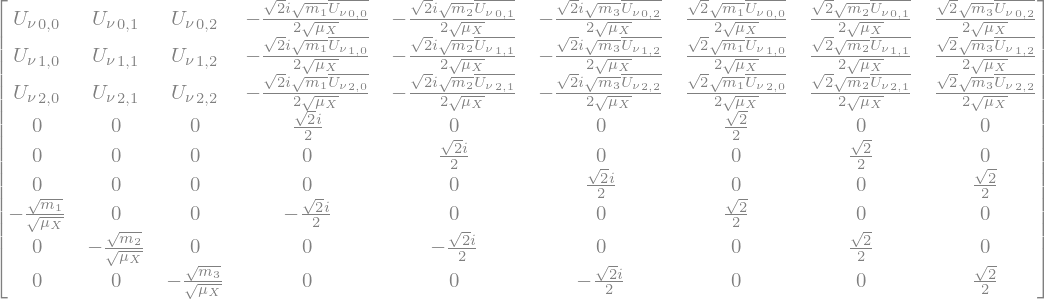

In [17]:
U_approx6 = U_approx5.subs(unitarity_conditions_UnuDaggerUnu).subs(unitarity_conditions_UnuUnuDagger)
U_approx6

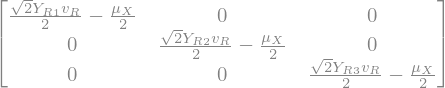

In [18]:
MMminus = MM - Mu/2
MMminus

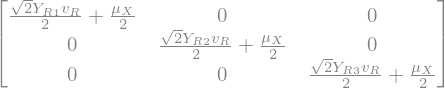

In [19]:
MMplus = MM + Mu/2
MMplus

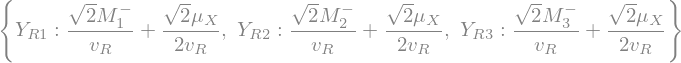

In [20]:
M1m, M2m, M3m = symbols('M_{1}^- M_{2}^- M_{3}^-', positive=True)
M1p, M2p, M3p = symbols('M_{1}^+ M_{2}^+ M_{3}^+', positive=True)
YR_sol = solve([MMminus[0, 0] - M1m, MMminus[1, 1] - M2m, MMminus[2, 2] - M3m], [YR1, YR2, YR3], dict=True)[0]
YR_sol

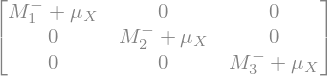

In [21]:
MMplus1 = MMplus.subs(YR_sol).applyfunc(lambda x:x.factor())
MMplus1

In [23]:
Mp = M1p, M2p, M3p
Mp_changes = {
    Mp[i]:MMplus1[i,i] for i in range(3)
}
Mp_changes

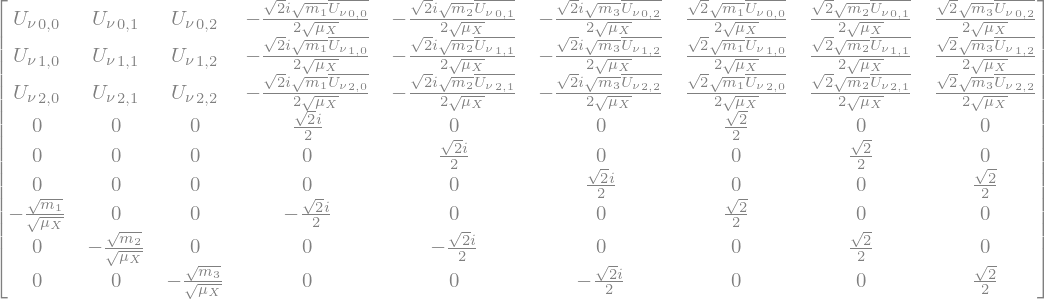

In [24]:
U_approx7 = U_approx6.subs(YR_sol).applyfunc(lambda x:x.factor())
U_approx7

In [25]:
UL = U_approx7[0:3,:]
UR = U_approx7[3:6,:]
US = U_approx7[6:9,:]

In [26]:
URmat = UR
URT = URmat.T
URc = conjugate(URmat)
URDagger = Dagger(URmat)
ULmat = UL
ULT = ULmat.T
ULc = conjugate(ULmat)
ULDagger = Dagger(ULmat)
USmat = US
UST = USmat.T
USc = conjugate(USmat)
USDagger = Dagger(USmat)
Vl = I3

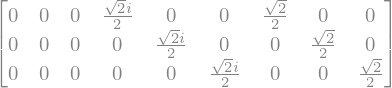

In [27]:
URmat

In [28]:
UL_right = (ULDagger*UL).applyfunc(lambda x:x.factor()).subs(
    unitarity_conditions_UnuDaggerUnu
)

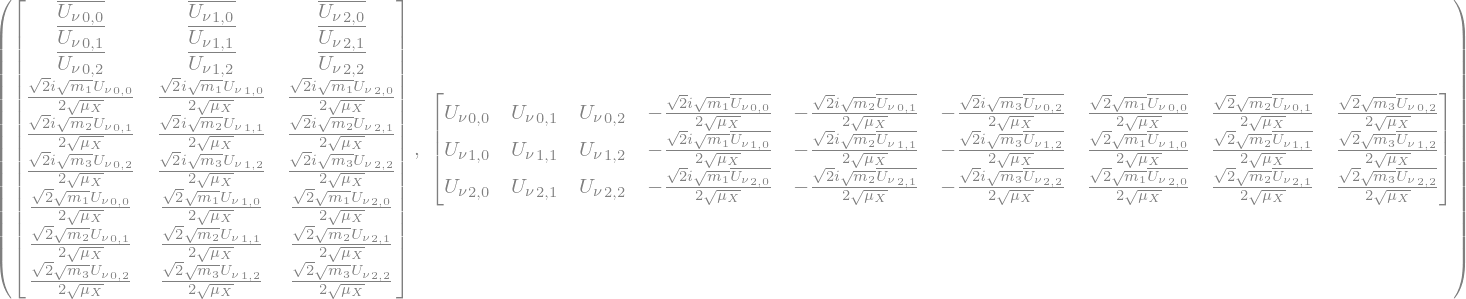

In [29]:
ULDagger, UL

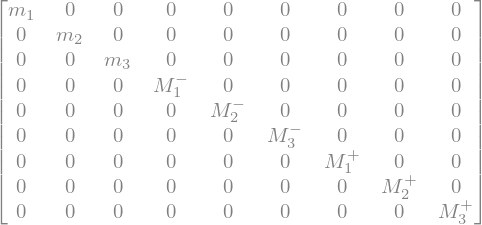

In [30]:
M_full_diag = Matrix(
    [
        [m1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, m2, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, m3, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, M1m, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, M2m, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, M3m, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, M1p, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, M2p, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, M3p]
    ]
)
M_full_diag

In [31]:
GRLmat = (URT*conjugate(URmat)*(M_full_diag)*UL_right).applyfunc(
    lambda x:x.factor()
).subs(unitarity_conditions_UnuDaggerUnu).subs(unitarity_conditions_UnuUnuDagger)

GSRmat = (USDagger*USc*(M_full_diag)*URDagger*URc).applyfunc(
    lambda x:x.factor().subs(unitarity_conditions_UnuDaggerUnu).subs(unitarity_conditions_UnuUnuDagger)
)

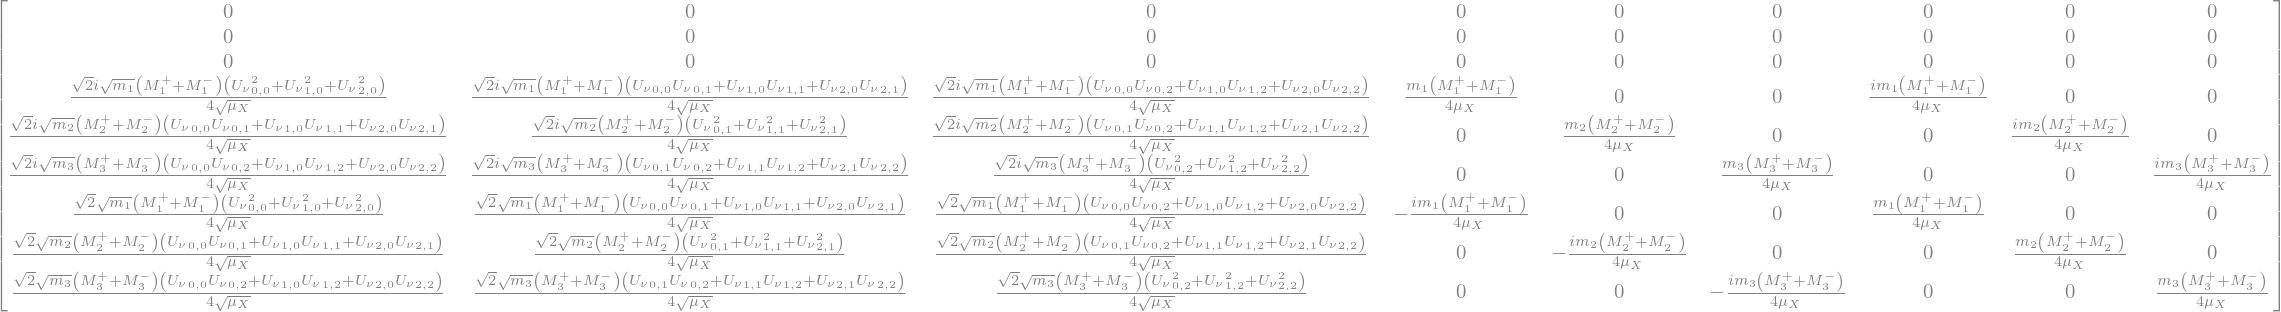

In [32]:
GRLmat.subs(unitarity_conditions_UnuDaggerUnu).subs(unitarity_conditions_UnuUnuDagger)

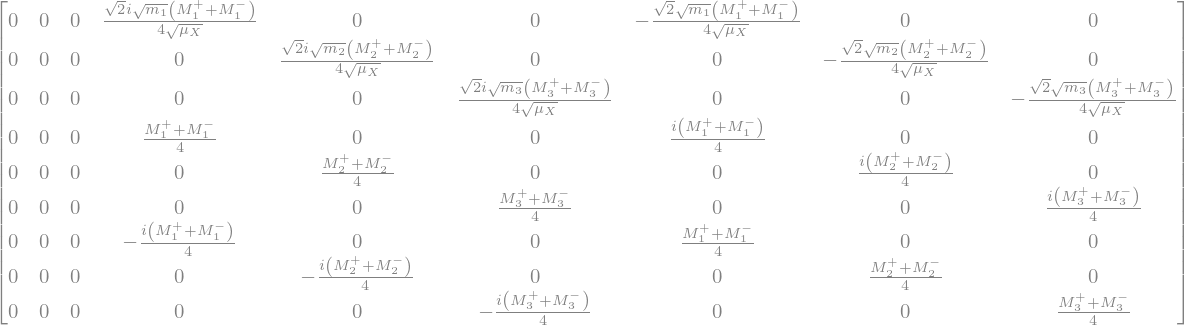

In [33]:
GSRmat

In [34]:
mNi_changes_degenerate = {
    M2m: M1m,
    M3m: M1m,
    M1p: M1m,
    M2p: M1m,
    M3p: M1m
}
mNi_changes_degenerate

In [185]:
#YR = symbols('Y_R', positive=True)

## $\Omega_{RL}$

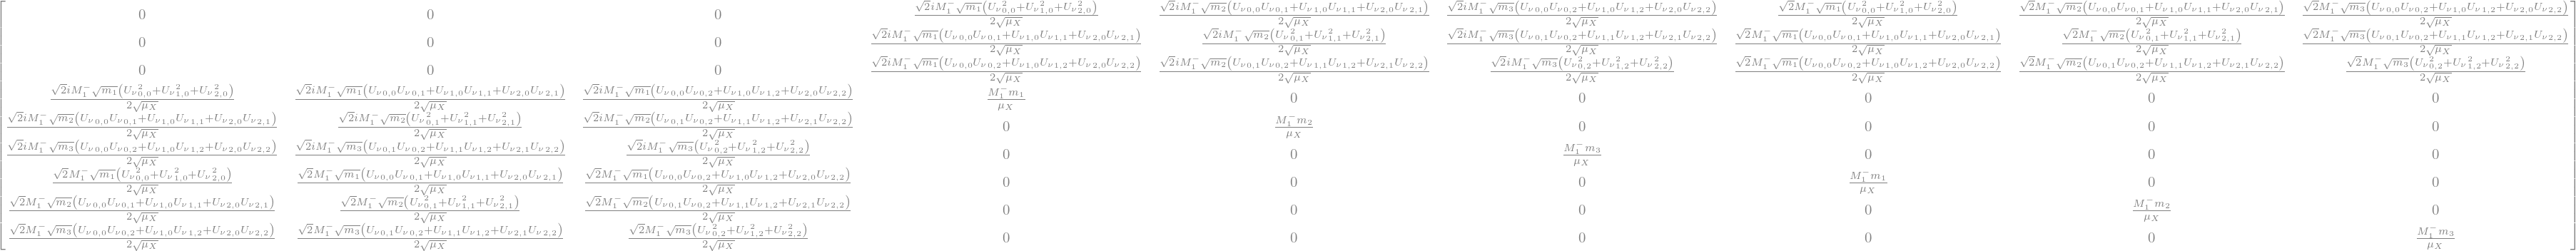

In [35]:
OmegaRLmat = (GRLmat + GRLmat.T).subs(mNi_changes_degenerate)#.applyfunc(lambda x:x.factor())
OmegaRLmat

In [36]:
#(OmegaRLmat*Dagger(OmegaRLmat)).applyfunc(
#    lambda x:x.collect([muX], lambda x:x.factor().subs(unitarity_conditions_UnuDaggerUnu).subs(unitarity_conditions_UnuUnuDagger)
#))

## $\Omega_{SR}$

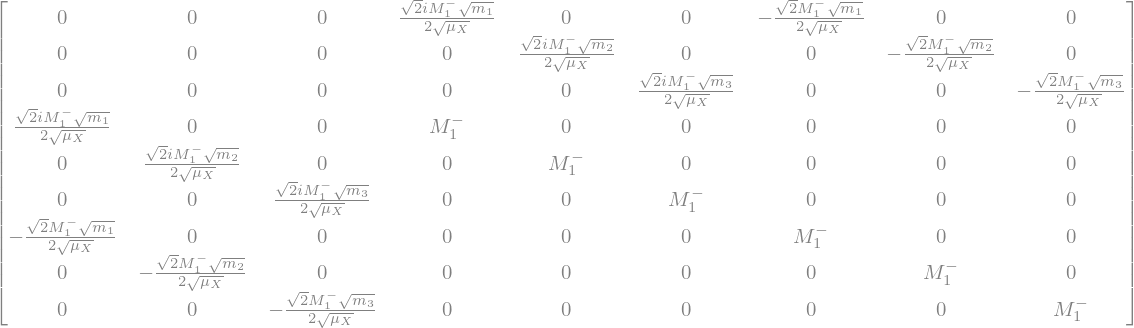

In [37]:
OmegaSRmat = (GSRmat + GSRmat.T).subs(mNi_changes_degenerate)#.applyfunc(lambda x:x.expand())
OmegaSRmat

In [189]:
#(OmegaSRmat*Dagger(OmegaSRmat)).applyfunc(
#    lambda x:x.expand().collect(
#        [k1], lambda x:x.factor().subs(
#            unitarity_conditions_UnuDaggerUnu
#        ).subs(
#            unitarity_conditions_UnuUnuDagger
#        )
#    )
#).applyfunc(lambda x:x.factor())

## $Q_L$

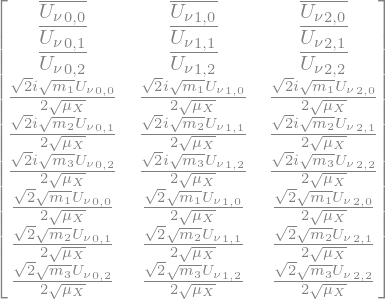

In [38]:
QLDagger = (ULDagger*Vl).subs(mNi_changes_degenerate)#.applyfunc(lambda x:x.expand())
QLmat = Dagger(QLDagger).subs(mNi_changes_degenerate)#.applyfunc(lambda x:x.expand())
QLDagger

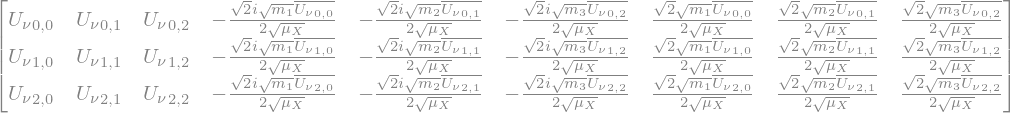

In [39]:
QLmat

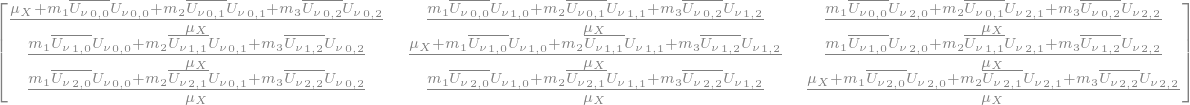

In [42]:
(QLmat*QLDagger).subs(unitarity_conditions_UnuDaggerUnu).subs(unitarity_conditions_UnuUnuDagger).applyfunc(
    lambda x:x.factor()
).subs(unitarity_conditions_UnuDaggerUnu).subs(unitarity_conditions_UnuUnuDagger)

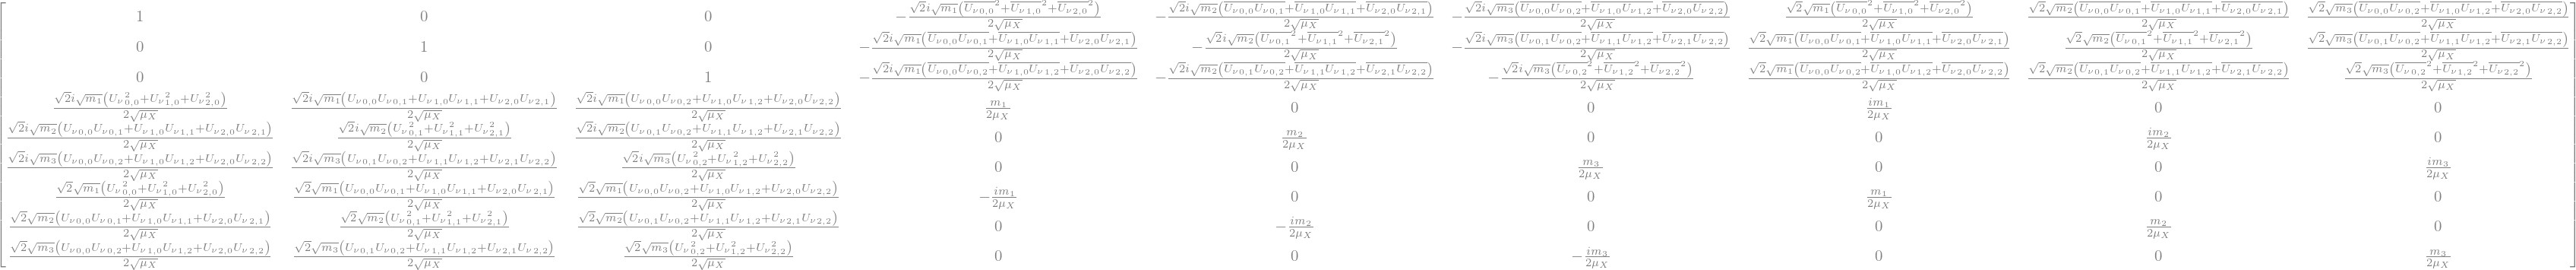

In [43]:
(QLDagger*QLmat).subs(unitarity_conditions_UnuDaggerUnu).subs(unitarity_conditions_UnuUnuDagger).applyfunc(
    lambda x:x.factor()
).subs(unitarity_conditions_UnuDaggerUnu).subs(unitarity_conditions_UnuUnuDagger)

## $Q_R$

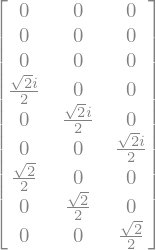

In [44]:
QRDagger = (URT*Vl).subs(mNi_changes_degenerate)
QRmat = Dagger(QRDagger).subs(mNi_changes_degenerate)
QRDagger

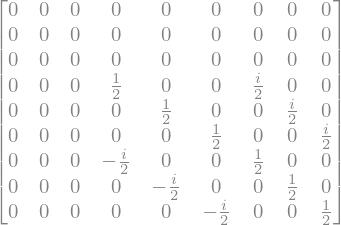

In [45]:
(QRDagger*QRmat).applyfunc(factor)

## SRLmat

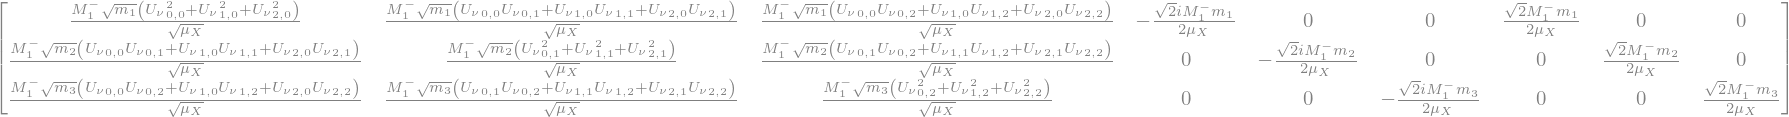

In [46]:
SRLmat = (QRmat*(M_full_diag)*ULDagger*ULmat).subs(mNi_changes_degenerate).applyfunc(
    lambda x:x.expand().collect([muX], lambda x:x.factor())
).subs(unitarity_conditions_UnuUnuDagger).subs(unitarity_conditions_UnuDaggerUnu)
SRLDagger = Dagger(SRLmat).subs(mNi_changes_degenerate).applyfunc(
    lambda x:x.expand().collect([muX], lambda x:x.factor())
).subs(unitarity_conditions_UnuUnuDagger).subs(unitarity_conditions_UnuDaggerUnu)
SRLmat

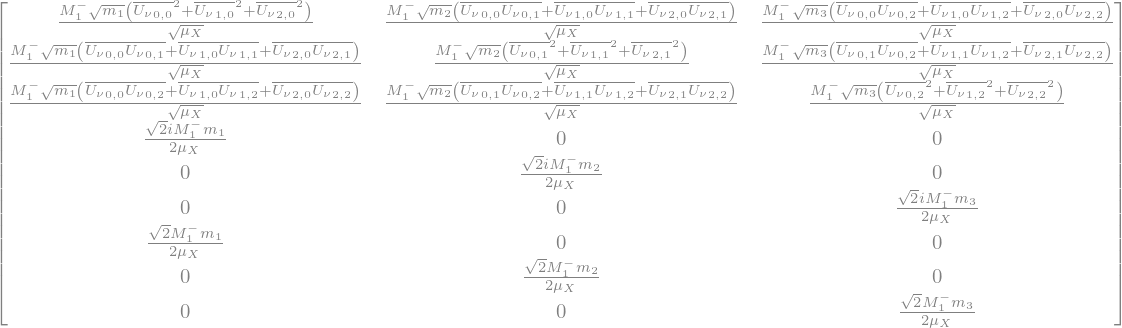

In [47]:
SRLDagger

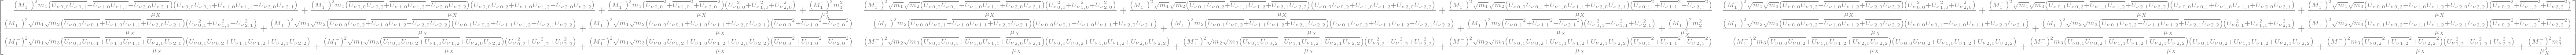

In [48]:
(SRLmat*SRLDagger)

In [49]:
#(SRLDagger*SRLmat).applyfunc(lambda x:x.simplify()).subs(unitarity_conditions_UnuDaggerUnu).subs(unitarity_conditions_UnuUnuDagger)

## TRLmat

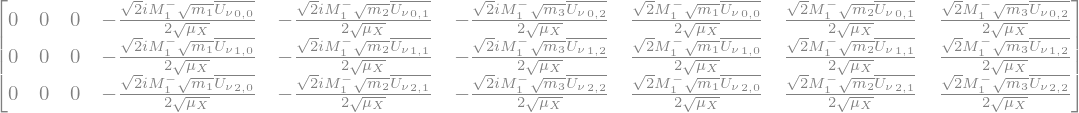

In [50]:
TRLmat = (URT*URc*(M_full_diag)*QLDagger).subs(mNi_changes_degenerate).applyfunc(
    lambda x:x.expand().collect([muX], lambda x:x.factor())
).subs(unitarity_conditions_UnuUnuDagger).subs(unitarity_conditions_UnuDaggerUnu)
TRLDagger = Dagger(TRLmat).subs(mNi_changes_degenerate).applyfunc(
    lambda x:x.expand().collect([muX], lambda x:x.factor())
).subs(unitarity_conditions_UnuUnuDagger).subs(unitarity_conditions_UnuDaggerUnu)
TRLDagger

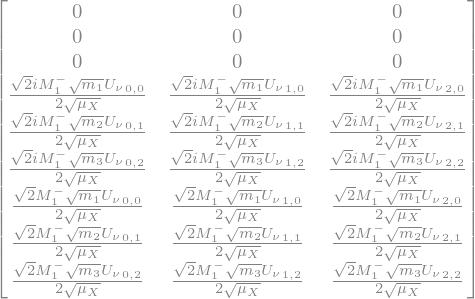

In [51]:
TRLmat

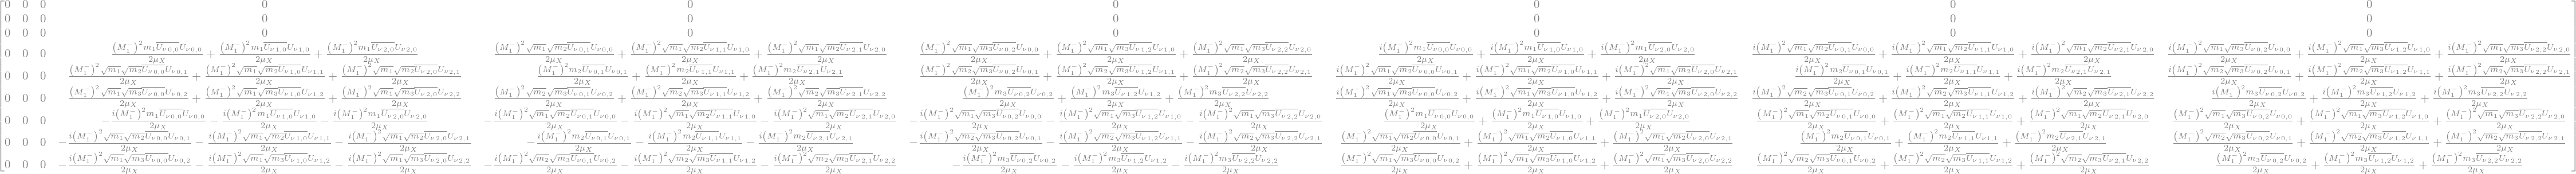

In [52]:
(TRLmat*TRLDagger).subs(unitarity_conditions_UnuDaggerUnu).subs(unitarity_conditions_UnuUnuDagger)

## TSRmat

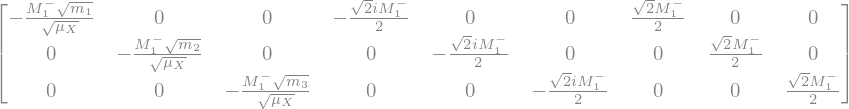

In [53]:
TSRmat = (USDagger*USc*(M_full_diag)*URDagger*Vl).subs(mNi_changes_degenerate)
TSRDagger = Dagger(TSRmat).subs(mNi_changes_degenerate)
TSRDagger

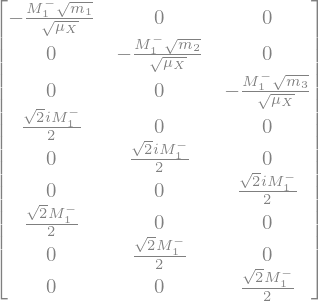

In [54]:
TSRmat

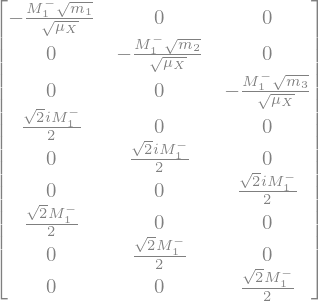

In [55]:
TSRmat#.subs(Unu_changes).subs(m1, mn1_np).subs(m2, mn2_np).subs(m3, mn3_np).subs(M1m, 1000).subs(muX, 1e-3).subs(epsilon, 246/1e4)

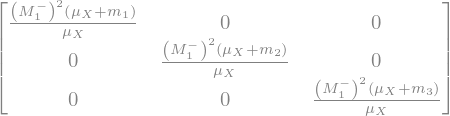

In [56]:
(TSRDagger*TSRmat).applyfunc(lambda x:x.simplify()).subs(unitarity_conditions_UnuDaggerUnu).subs(unitarity_conditions_UnuUnuDagger)

## Kmat

In [57]:
from DLRSM1.potential_senjanovic_HiggsDoublets import epsilon

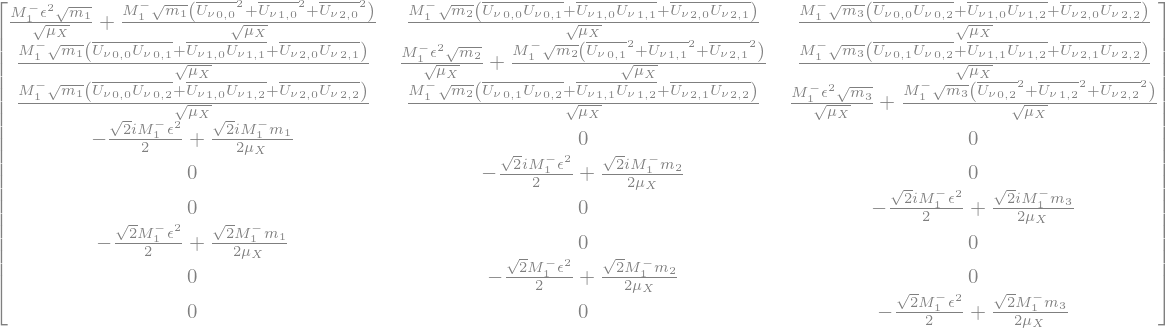

In [58]:
Kmat = (SRLmat - epsilon**2*TSRDagger).subs(mNi_changes_degenerate)
KDagger = Dagger(Kmat).subs(mNi_changes_degenerate)
KDagger

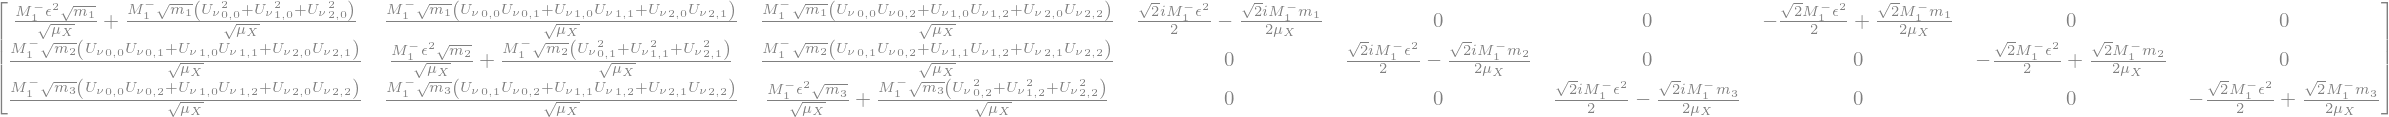

In [59]:
Kmat

In [60]:
#Kmat_num = Kmat.subs(Unu_changes).subs(m1, mn1_np).subs(m2, mn2_np).subs(m3, mn3_np).subs(M1m, 1000).subs(muX, 1e-3).subs(epsilon, 246/1e4)
#Kmat_num*Dagger(Kmat_num)

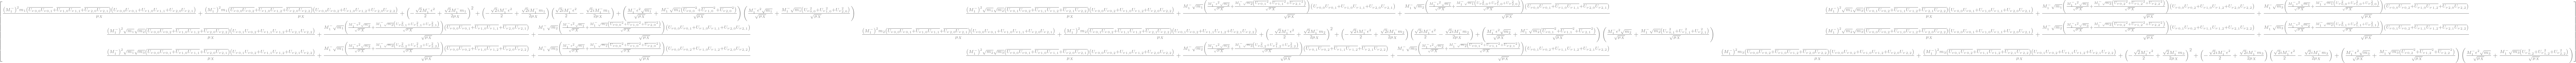

In [61]:
(Kmat*KDagger)#.subs(unitarity_conditions_UnuDaggerUnu).subs(unitarity_conditions_UnuUnuDagger)

## Jmat

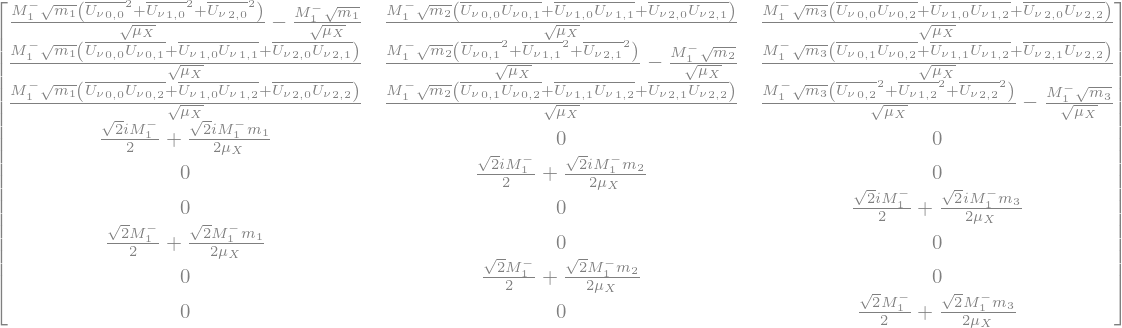

In [62]:
Jmat = (TSRDagger + SRLmat).subs(mNi_changes_degenerate)
JDagger = Dagger(Jmat).subs(mNi_changes_degenerate)
JDagger

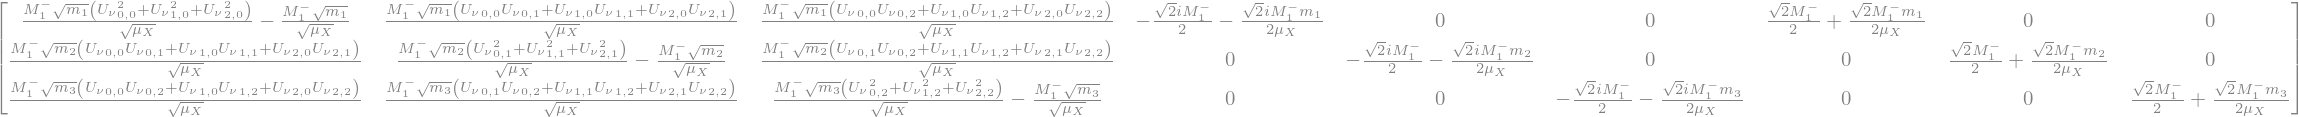

In [63]:
Jmat

In [64]:
Unui0_sum = sum([conjugate(Unu[i,0])**2 for i in range(3)])#.subs(Unu_changes)
Unui0_sum

In [65]:
Unui_sum = sum([conjugate(Unu[i,0]*Unu[i,1])**2 for i in range(3)])#.subs(Unu_changes)
Unui_sum

In [66]:
#Jmat_num = Jmat.subs(Unu_changes).subs(m1, mn1_np).subs(m2, mn2_np).subs(m3, mn3_np).subs(M1m, 1000).subs(muX, 1e-3)
#Jmat_num

In [217]:
#Jmat_num*Dagger(Jmat_num)

In [218]:
#Dagger(Jmat_num)*Jmat_num

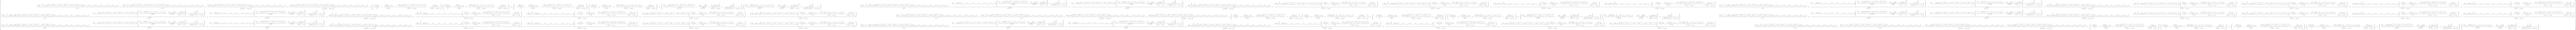

In [219]:
(Jmat*JDagger)#.subs(unitarity_conditions_UnuDaggerUnu).subs(unitarity_conditions_UnuUnuDagger)

# Lambdify

In [67]:
from neutrinos import UpmnsStandardParametrization, NuOscObservables
Nudata = NuOscObservables
th12,th13,th23 = symbols(r'\theta_{12}, \theta_{13}, \theta_{23}')
mixing_angles = Nudata().substitutions(th12,th13,th23)
c12,c13,c23 = cos(th12), cos(th13), cos(th23)
s12,s13,s23 = sin(th12), sin(th13), sin(th23)
Upmns_val = UpmnsStandardParametrization(th12,th13,th23).subs(mixing_angles)

Unu_changes = {
        Unu[i,j]:Upmns_val[i,j] for i in range(3) for j in range(3)
    }

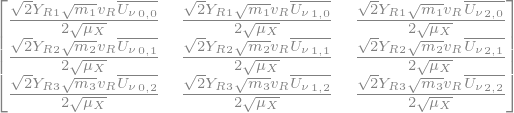

In [68]:
mD_CI

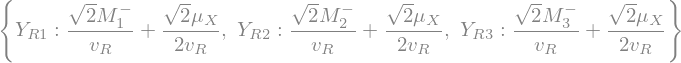

In [69]:
YR_sol

In [70]:
mNi_changes_degenerate

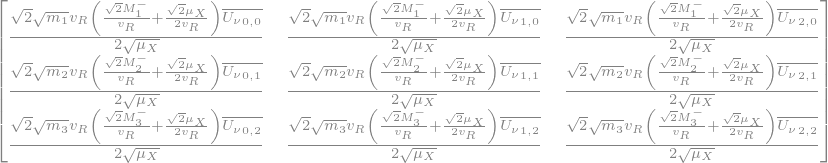

In [71]:
mD_CI.subs(YR_sol)#.subs(mNi_changes_degenerate).applyfunc(lambda x:x.factor())

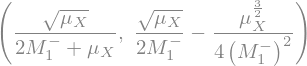

In [72]:
r = sqrt(muX)/(2*M1m + muX)
r, r.series(muX, 0, 2).removeO()

In [73]:
from DLRSM1.FeynmanRules_senjanovic_H10_Z1_GM import OmegaRL, OmegaSR, QL, QR, TRL, K, J, ml, mn, i, j, a, b

In [74]:
from LFVXD.PaVe2 import D as Dim

In [228]:
Dim

In [75]:
mla, mlb, mni, mnj = symbols('m_{l_a}, m_{l_b}, m_{n_i}, m_{n_j}', positive=True)

QLai = symbols('Q_{Lai}')
QLbi = symbols('Q_{Lbi}')
QLbj = symbols('Q_{Lbj}')
QLaic = symbols(r'\overline{Q_{Lai}}')
QLbic = symbols(r'\overline{Q_{Lbi}}')
QLbjc = symbols(r'\overline{Q_{Lbj}}')
QRai = symbols('Q_{Rai}')
QRbi = symbols('Q_{Rbi}')
QRbj = symbols('Q_{Rbj}')
QRaic = symbols(r'\overline{Q_{Rai}}')
QRbic = symbols(r'\overline{Q_{Rbi}}')
QRbjc = symbols(r'\overline{Q_{Rbj}}')
TRLib = symbols('T_{RLib}')
TRLjb = symbols('T_{RLjb}')
TRLia = symbols('T_{RLia}')
TRLiac  = symbols(r'\overline{T_{RLia}}')
TRLibc  = symbols(r'\overline{T_{RLib}}')
TRLjbc  = symbols(r'\overline{T_{RLjb}}')
Jai = symbols('J_{ai}')
Jbi = symbols('J_{bi}')
Jbj = symbols('J_{bj}')
Jaic = symbols(r'\overline{J_{ai}}')
Jbic = symbols(r'\overline{J_{bi}}')
Jbjc = symbols(r'\overline{J_{bj}}')
Kai = symbols('K_{ai}')
Kbi = symbols('K_{bi}')
Kbj = symbols('K_{bj}')
Kaic = symbols(r'\overline{K_{ai}}')
Kbic = symbols(r'\overline{K_{bi}}')
Kbjc = symbols(r'\overline{K_{bj}}')
OmegaRLij = symbols(r'\Omega_{RLij}')
OmegaRLijc = symbols(r'\overline{\Omega_{RLij}}')
OmegaSRij = symbols(r'\Omega_{SRij}')
OmegaSRijc = symbols(r'\overline{\Omega_{SRij}}')

In [76]:
symbolic_changes = {
    ml[a]:mla,
    ml[b]:mlb,
    mn[i]:mni,
    mn[j]:mnj,
    QL[a,i]:QLai,
    QL[b,i]:QLbi,
    QL[b,j]:QLbj,
    conjugate(QL[a, i]):QLaic,
    conjugate(QL[b, i]):QLbic,
    conjugate(QL[b, j]):QLbjc,
    QR[a,i]:QRai,
    QR[b,i]:QRbi,
    QR[b,j]:QRbj,
    conjugate(QR[a, i]):QRaic,
    conjugate(QR[b, i]):QRbic,
    conjugate(QR[b, j]):QRbjc,
    TRL[i, a]:TRLia,
    TRL[i, b]:TRLib,
    TRL[j, b]:TRLjb,
    conjugate(TRL[i, a]):TRLiac,
    conjugate(TRL[i, b]):TRLibc,
    conjugate(TRL[j, b]):TRLjbc,
    J[a,i]:Jai,
    J[b,i]:Jbi,
    J[b,j]:Jbj,
    conjugate(J[a,i]):Jaic,
    conjugate(J[b,i]):Jbic,
    conjugate(J[b,j]):Jbjc,
    K[a,i]:Kai,
    K[b,i]:Kbi,
    K[b,j]:Kbj,
    conjugate(K[a,i]):Kaic,
    conjugate(K[b,i]):Kbic,
    conjugate(K[b,j]):Kbjc,
    OmegaRL[i, j]:OmegaRLij,
    conjugate(OmegaRL[i,j]):OmegaRLijc,
    OmegaSR[i, j]:OmegaSRij,
    conjugate(OmegaSR[i,j]):OmegaSRijc,
    Dim:4,
}
bubbles = ['ni_GL', 'GL_ni', 'ni_GR', 'GR_ni', 'ni_HR', 'HR_ni', 'ni_W1', 'W1_ni', 'ni_W2', 'W2_ni']
bubble_diagrams = {interaction:all_diagrams[interaction] for interaction in bubbles}
symbolic_formfactor_bubble = {
    interaction:{
        'AL':diagram.AL().factor().subs(symbolic_changes),
        'AR':diagram.AR().factor().subs(symbolic_changes)
    } for interaction, diagram in bubble_diagrams.items()
}

triangles_onefermion = [
    'ni_GLp_GLm', 'ni_GRp_GRm', 'ni_HRp_HRm', 'ni_W1p_W1m', 'ni_W2p_W2m', 
    'ni_GRp_HRm', 'ni_HRp_GRm', 'ni_W1p_GLm', 'ni_W2p_GRm', 'ni_W2p_HRm',
    'ni_GLp_W1m', 'ni_GRp_W2m', 'ni_HRp_W2m'
]
triangle_diagrams_onefermion = {interaction:all_diagrams[interaction] for interaction in triangles_onefermion}
symbolic_formfactor_triangle_onefermion = {
    interaction:{
        'AL':diagram.AL().expand().collect(
            [rho1], factor
        ).subs(symbolic_changes),
        'AR':diagram.AR().expand().collect(
            [rho1], factor
        ).subs(symbolic_changes)
    } for interaction, diagram in triangle_diagrams_onefermion.items()
}

triangles_twofermion = [
    'GL_ninj', 'GR_ninj', 'HR_ninj', 'W1_ninj', 'W2_ninj'
]
triangle_diagrams_twofermion = {interaction:all_diagrams[interaction] for interaction in triangles_twofermion}
symbolic_formfactor_triangle_twofermion = {
    interaction:{
        'AL':diagram.AL().factor().subs(symbolic_changes),
        'AR':diagram.AR().factor().subs(symbolic_changes)
    } for interaction, diagram in triangle_diagrams_twofermion.items()
}

symbolic_formfactor = {
    **symbolic_formfactor_bubble,
    **symbolic_formfactor_triangle_onefermion,
    **symbolic_formfactor_triangle_twofermion
}

In [77]:
all_diagrams.keys()

dict_keys(['ni_GLp_GLm', 'ni_GRp_GRm', 'ni_HRp_HRm', 'ni_GRp_HRm', 'ni_HRp_GRm', 'ni_W1p_W1m', 'ni_W2p_W2m', 'ni_W1p_GLm', 'ni_W2p_GRm', 'ni_W2p_HRm', 'ni_GLp_W1m', 'ni_GRp_W2m', 'ni_HRp_W2m', 'ni_W1', 'ni_W2', 'W1_ni', 'W2_ni', 'ni_GL', 'ni_GR', 'ni_HR', 'GL_ni', 'GR_ni', 'HR_ni', 'GL_ninj', 'GR_ninj', 'HR_ninj', 'W1_ninj', 'W2_ninj'])

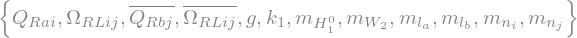

In [78]:
symbolic_formfactor['W2_ninj']['AR'].atoms(Symbol)

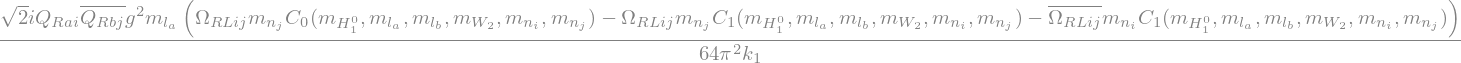

In [79]:
symbolic_formfactor['W2_ninj']['AR']

In [80]:
from LFVXD.numeric.looptools_pv import B1_0, B2_0, B1_1, B2_1, B12_0, C0_, C1_, C2_,C00, C11, C12, C22

   FF 2.0, a package to evaluate one-loop integrals
 written by G. J. van Oldenborgh, NIKHEF-H, Amsterdam
 for the algorithms used see preprint NIKHEF-H 89/17,
 'New Algorithms for One-loop Integrals', by G.J. van
 Oldenborgh and J.A.M. Vermaseren, published in 
 Zeitschrift fuer Physik C46(1990)425.


In [81]:
# Passarino-Veltman functions definitions
pv_functions = {
    'B1_0':B1_0,
    'B2_0':B2_0,
    'B1_1':B1_1,
    'B2_1':B2_1,
    'B12_0':B12_0,
    'C0': C0_,
    'C1': C1_,
    'C2': C2_,
    'C00': C00,
    'C11': C11,
    'C12': C12,
    'C22': C22
}

In [82]:
import LFVXD.PaVe2 as PaVe

In [83]:
def factor_pv_functions(exp, simplification=factor):
    pv_functions = list(exp.atoms(PaVe.PaVeFunction))
    exp = exp.expand().collect(pv_functions, lambda x:simplification(x))
    return exp

In [84]:

for interaction, ff in symbolic_formfactor.items():
    print(interaction)
    ffAL = factor_pv_functions(ff['AL'])
    ffAR = factor_pv_functions(ff['AR'])
    symbolic_formfactor[interaction]['AL'] = ffAL
    symbolic_formfactor[interaction]['AR'] = ffAR

ni_GL
GL_ni
ni_GR
GR_ni
ni_HR
HR_ni
ni_W1
W1_ni
ni_W2
W2_ni
ni_GLp_GLm
ni_GRp_GRm
ni_HRp_HRm
ni_W1p_W1m
ni_W2p_W2m
ni_GRp_HRm
ni_HRp_GRm
ni_W1p_GLm
ni_W2p_GRm
ni_W2p_HRm
ni_GLp_W1m
ni_GRp_W2m
ni_HRp_W2m
GL_ninj
GR_ninj
HR_ninj
W1_ninj
W2_ninj


In [85]:
one_fermion_diagrams = [
        'ni_GL', 'GL_ni', 'ni_GR',
        'GR_ni', 'ni_HR', 'HR_ni',
        'ni_W1', 'W1_ni', 'ni_W2',
        'W2_ni', 'ni_GLp_GLm', 'ni_GRp_GRm',
        'ni_HRp_HRm', 'ni_W1p_W1m', 'ni_W2p_W2m',
        'ni_GRp_HRm', 'ni_HRp_GRm', 'ni_W1p_GLm',
        'ni_W2p_GRm', 'ni_W2p_HRm', 'ni_GLp_W1m',
        'ni_GRp_W2m', 'ni_HRp_W2m'
]
#for interaction in one_fermion_diagrams:
#    print(interaction)
#    display(symbolic_formfactor[interaction]['AL'].atoms(Symbol))

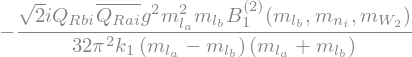

In [86]:
symbolic_formfactor['W2_ni']['AL']#.atoms(Symbol)

In [87]:
m1

In [88]:
ml = symbols(r'm_e m_\mu m_\tau', positive=True)
#mn = symbols(r'm_{n_1} m_{n_2} m_{n_3} m_{n_4} m_{n_5} m_{n_6} m_{n_7} m_{n_8} m_{n_9}', positive=True)
mn = [m1, m2, m3, M1m, M2m, M3m, M1p, M2p, M3p]
a = 1
b = 2
symbolic_formfactor_nu_sum = {}
for interaction, formfactor in symbolic_formfactor.items():
    if interaction in one_fermion_diagrams:
        #print(interaction)
        qL = 0
        qR = 0
        for i in range(9):
            one_neutrino_changes = {
                mla:ml[a],
                mlb:ml[b],
                mni:mn[i],
                Kai:Kmat[a,i],
                Kbi:Kmat[b,i],
                Kaic:conjugate(Kmat[a,i]),
                Kbic:conjugate(Kmat[b,i]),
                QRai:QRmat[a,i],
                QRaic:conjugate(QRmat[a,i]),
                QRbi:QRmat[b,i],
                QRbic:conjugate(QRmat[b,i]),
                QLai:QLmat[a,i],
                QLbi:QLmat[b,i],
                QLaic:conjugate(QLmat[a,i]),
                QLbic:conjugate(QLmat[b,i]),
                TRLia:TRLmat[i,a],
                TRLib:TRLmat[i,b],
                TRLibc:conjugate(TRLmat[i,b]),
                TRLiac:conjugate(TRLmat[i,a]),
                Jai:Jmat[a,i],
                Jbi:Jmat[b,i],
                Jaic:conjugate(Jmat[a,i]),
                Jbic:conjugate(Jmat[b,i])
            }
            qR += formfactor['AR'].subs(one_neutrino_changes)
            qL += formfactor['AL'].subs(one_neutrino_changes)
        symbolic_formfactor_nu_sum[interaction] = {'AR': qR, 'AL': qL}

In [89]:
factor_pv_functions(symbolic_formfactor_nu_sum['ni_W2']['AL']).factor()

In [90]:
AL_total = 0
AR_total = 0
for interaction, formfactors in symbolic_formfactor_nu_sum.items():
    #print(interaction)
    AR_total += formfactors['AR']
    AL_total += formfactors['AL']
    #if Kaic in symbolic_formfactor[interaction]['AL'].atoms(Symbol):
    #    print(f"Kaic found in {interaction}")

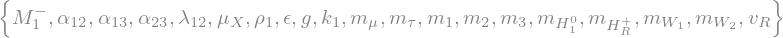

In [91]:
AL_total.subs(mNi_changes_degenerate).atoms(Symbol)

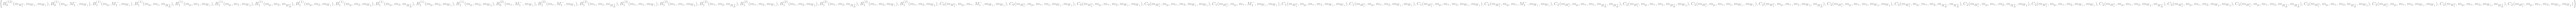

In [92]:
AL_total.subs(mNi_changes_degenerate).atoms(PaVe.PaVeFunction)

In [93]:
#factor_pv_functions(AR_total.subs(mNi_changes_degenerate))

In [94]:
two_fermion_diagrams = ['GL_ninj', 'GR_ninj', 'HR_ninj', 'W1_ninj', 'W2_ninj']

In [95]:
symbolic_formfactor_nu_sum_two = {}
for interaction, formfactor in symbolic_formfactor.items():
    if interaction in two_fermion_diagrams: #two_fermion_diagrams
        #print(interaction)
        qL = 0
        qR = 0
        for i in range(9):
            for j in range(9):
                two_neutrino_changes = {
                    mla:ml[a],
                    mlb:ml[b],
                    mni:mn[i],
                    mnj:mn[j],
                    Kai:Kmat[a,i], #
                    Kbjc:conjugate(Kmat[b,j]), #
                    QRai:QRmat[a,i], # <-- changed from QRai
                    QRbjc:conjugate(QRmat[b,j]),
                    QLai:QLmat[a,i], #
                    QLbjc:conjugate(QLmat[b,j]), # <-- changed from QLbic
                    TRLjb:TRLmat[j,b], # <-- changed from TRLib
                    TRLiac:conjugate(TRLmat[i,a]), # 
                    Jai:Jmat[a,i], #
                    Jbjc:conjugate(Jmat[b,j]), #
                    OmegaRLij:OmegaRLmat[i,j], #
                    OmegaRLijc:conjugate(OmegaRLmat[i,j]), #
                }
                qR += formfactor['AR'].subs(two_neutrino_changes)
                qL += formfactor['AL'].subs(two_neutrino_changes)
        if qL==0 and qR==0:
            print(f"Zero formfactor in {interaction}")
        symbolic_formfactor_nu_sum_two[interaction] = {'AR': qR, 'AL': qL}

Zero formfactor in W2_ninj


In [96]:
AL_total_two = 0
AR_total_two = 0
for interaction, formfactors in symbolic_formfactor_nu_sum_two.items():
    #print(interaction)
    AR_total_two += formfactors['AR']
    AL_total_two += formfactors['AL']
    #if Kaic in symbolic_formfactor[interaction]['AL'].atoms(Symbol):
    #    print(f"Kaic found in {interaction}")

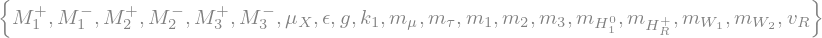

In [97]:
AL_total_two.atoms(Symbol)

In [98]:
#ffL_two_vR = factor_pv_functions(AL_total_two.subs(mNi_changes_degenerate))
#ffR_two_vR = factor_pv_functions(AR_total_two.subs(mNi_changes_degenerate))

In [253]:
#ffL_two_vR

In [99]:
import numpy as np

In [100]:
d21 = float(Nudata.squareDm21.central)*1e-18 # factor to convert eV^2 to GeV^2
d31 = float(Nudata.squareDm31.central)*1e-18
mn1_val = 1e-12  #GeV
mn2_val = np.sqrt(mn1_val**2 + d21)
mn3_val = np.sqrt(mn1_val**2 + d31)
me_val = 0.00511
mmu_val = 0.105
mtau_val = 1.776
ml_vals = [
    me_val,
    mmu_val,
    mtau_val
]


mW1_val = 80.3692


$$
m_{W_{2}^{\pm}}^{2}=\frac{m_{W_{1}^{\pm}}^{2}}{k_{1}^{2}}\left(k_{1}^{2}+v_{R}^{2}\right)
$$

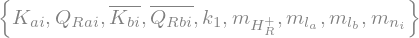

In [101]:
symbolic_formfactor['ni_HR']['AL'].atoms(Symbol)

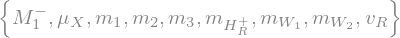

In [102]:
k1_np = 246
YR4_np = 1e-0
YR5_np = 1e-0
YR6_np = 1e-0
vR_np = 1e5  #GeV
g_np = 0.653  # SU(2) gauge coupling at the electroweak scale
rho1_val = 1
alpha13_val = 1
alpha12_val = 1
alpha23_val = 1 # alpha2 - alpha3 > 0
mH10_val = 125  #GeV
lamb12_val = mH10_val**2/(8*k1_np**2) + alpha13_val**2/(4*rho1_val)  # to have mH10 = 125 GeV

numerical_values_changes = {
        alpha12:alpha12_val,
        alpha13:alpha13_val,
        alpha23:alpha23_val,
        lamb12:lamb12_val,
        rho1:rho1_val,
        g:g_np,
        k1:k1_np,
        mH10:mH10_val,
        ml[0]:ml_vals[0],
        ml[1]:ml_vals[1],
        ml[2]:ml_vals[2],
    }
AL_num_one = AL_total.subs(mNi_changes_degenerate).subs(epsilon, k1/vR).subs(
    numerical_values_changes
).subs(Unu_changes)

AR_num_one = AR_total.subs(mNi_changes_degenerate).subs(epsilon, k1/vR).subs(
    numerical_values_changes
).subs(Unu_changes)

AL_num_two = AL_total_two.subs(mNi_changes_degenerate).subs(epsilon, k1/vR).subs(
    numerical_values_changes
).subs(Unu_changes)

AR_num_two = AR_total_two.subs(mNi_changes_degenerate).subs(epsilon, k1/vR).subs(
    numerical_values_changes
).subs(Unu_changes)

AL_num_two.atoms(Symbol)

## Plotting

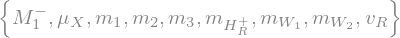

In [103]:
AR_num_two.atoms(Symbol)

In [104]:
import matplotlib.pyplot as plt

In [105]:
AL_lambdify_one = lambdify((mn[0], mn[1], mn[2], M1m, mW1, mW2, mHR, vR, muX), AL_num_one, modules=[pv_functions,'numpy'])
AR_lambdify_one = lambdify((mn[0], mn[1], mn[2], M1m, mW1, mW2, mHR, vR, muX), AR_num_one, modules=[pv_functions,'numpy'])
AL_lambdify_two = lambdify((mn[0], mn[1], mn[2], M1m, mW1, mW2, mHR, vR, muX), AL_num_two, modules=[pv_functions,'numpy'])
AR_lambdify_two = lambdify((mn[0], mn[1], mn[2], M1m, mW1, mW2, mHR, vR, muX), AR_num_two, modules=[pv_functions,'numpy'])

# Vectorize the lambdified functions to handle array inputs
#AL_lambdify_one_vec = np.vectorize(AL_lambdify_one)
#AR_lambdify_one_vec = np.vectorize(AR_lambdify_one)
#AL_lambdify_two_vec = np.vectorize(AL_lambdify_two)
#AR_lambdify_two_vec = np.vectorize(AR_lambdify_two)

In [106]:
AL_lambdify_two(1,2,3,4,5,6,7,8,9)

array([2.88303654e-10-4.91831758e-10j])

In [107]:
k1_np = 246
muX_np = 1e-3
YR_np = 1e-0
vR_np = 1e5  #GeV
g_np = 0.653  # SU(2) gauge coupling at the electroweak scale


d21 = Nudata.squareDm21.central*1e-18  # factor to convert eV^2 to GeV^2
d31 = Nudata.squareDm31.central*1e-18
mn1_np = 1e-12 #GeV
mn2_np = np.sqrt(mn1_np**2 + d21)
mn3_np = np.sqrt(mn1_np**2 + d31)
M1m_np = lambda YR, vR: YR*vR/np.sqrt(2)

mW1_np = 80.3692
mW2_squared_np = lambda vR: (mW1_np**2/k1_np**2)*(k1_np**2 + vR**2)
mW2_np = lambda vR: np.sqrt(mW2_squared_np(vR))
mH10_np = 125
alpha23_np = 0.1
mHR_squared_np = lambda vR: (alpha23_np)*(k1_np**2 + vR**2)
mHR_np = lambda vR: np.sqrt(mHR_squared_np(vR))

mHR_np = np.vectorize(mHR_np)

In [108]:
M1m_np(YR_np, vR_np)

In [109]:
from LFVXD.Hdecay_diagrams_v2 import calculate_decay_width, calculate_branching_ratio

calculate_branching_ratio_vec = np.vectorize(calculate_branching_ratio)

In [110]:
def formfactors_numpy(vR, mn1=mn1_np, mn2=mn2_np, mn3=mn3_np, M1m=M1m_np(YR_np, vR_np), mW1=mW1_np, mW2=mW2_np(vR_np), k1=k1_np, muX=muX_np, alpha23=alpha23_np):

    mHR_squared_np = (alpha23)*(k1**2 + vR**2)
    mHR_np = np.sqrt(mHR_squared_np)
    #print(f"mHR: {len(mHR_np)}")
    #print(f"vR: {len(vR)}")
    # mn[0], mn[1], mn[2], M1m, mW1, mW2, mHR, vR, muX
    AL_values_one = AL_lambdify_one(
        mn1,
        mn2,
        mn3,
        M1m,
        mW1,
        mW2,
        mHR_np,
        vR,
        muX
    )

    AR_values_one = AR_lambdify_one(
        mn1,
        mn2,
        mn3,
        M1m,
        mW1,
        mW2,
        mHR_np,
        vR, 
        muX
    )

    AL_values_two = AL_lambdify_two(
        mn1,
        mn2,
        mn3,
        M1m,
        mW1,
        mW2,
        mHR_np,
        vR,
        muX
    )

    AR_values_two = AR_lambdify_two(
        mn1,
        mn2,
        mn3,
        M1m,
        mW1,
        mW2,
        mHR_np,
        vR,
        muX
    )
    return {
        1: {'AL': AL_values_one, 'AR': AR_values_one},
        2: {'AL': AL_values_two, 'AR': AR_values_two}
    }

#formfactors_numpy = np.vectorize(formfactors_numpy)

In [111]:
YR_np, mn1_np, mn2_np, mn3_np, mW1_np

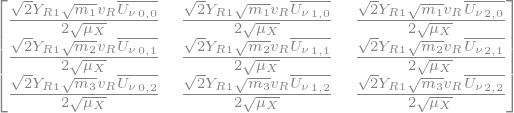

In [112]:
mD_CI.subs(YR3, YR1).subs(YR2, YR1)

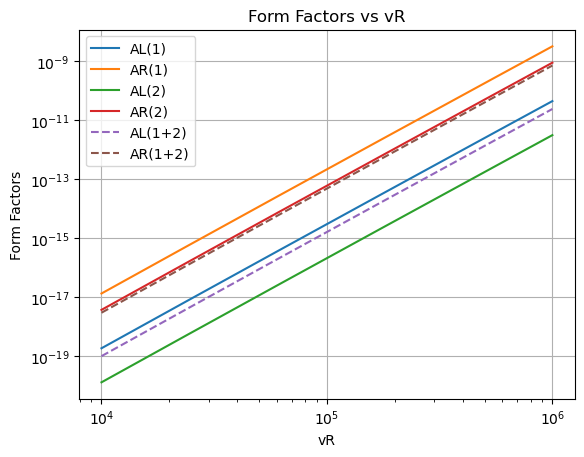

In [113]:
vR_values = np.logspace(4, 6, 200, dtype=np.float128)  # Logarithmically spaced values between 1e2 and 1e5
YR_np = 1
muX_np = 1e-2 #muX_lam(YR_np, vR_values)

formfactors = formfactors_numpy(vR_values, mn1_np, mn2_np, mn3_np, M1m_np(YR_np, vR_values), mW1_np, mW2_np(vR_values), k1_np, muX_np, alpha23_np)
plt.loglog(vR_values, np.abs(formfactors[1]['AL'])**2, label='AL(1)')
plt.loglog(vR_values, np.abs(formfactors[1]['AR'])**2, label='AR(1)')
plt.loglog(vR_values, np.abs(formfactors[2]['AL'])**2, label='AL(2)')
plt.loglog(vR_values, np.abs(formfactors[2]['AR'])**2, label='AR(2)')
plt.loglog(vR_values, np.abs(formfactors[1]['AL'] + formfactors[2]['AL'])**2, label='AL(1+2)', linestyle='--')
plt.loglog(vR_values, np.abs(formfactors[1]['AR'] + formfactors[2]['AR'])**2, label='AR(1+2)', linestyle='--')
#plt.loglog(vR_values, muX_np, label=r'$\mu_X$')
plt.xlabel('vR')
plt.ylabel('Form Factors')
plt.title('Form Factors vs vR')
plt.legend()
plt.grid()

In [114]:
# Widget-based Interactive Form Factors Plot
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatLogSlider, FloatSlider, IntSlider, Layout, VBox, HBox
import ipywidgets as widgets

def plot_formfactors_interactive(YR_log=-2, vR_min_log=2, vR_max_log=8, num_points=200, 
                                show_individual=True, show_combined=True, plot_width=10, plot_height=6):
    """
    Interactive plot of form factors vs vR with adjustable parameters.
    
    Parameters:
    YR_log: logarithm (base 10) of YR_np value
    vR_min_log: logarithm (base 10) of minimum vR value 
    vR_max_log: logarithm (base 10) of maximum vR value
    num_points: number of points in the vR array
    show_individual: whether to show individual AL(1), AR(1), AL(2), AR(2)
    show_combined: whether to show combined AL(1+2), AR(1+2)
    plot_width: width of the plot
    plot_height: height of the plot
    """
    
    # Convert log values to actual values
    YR_val = 10**YR_log
    vR_min = 10**vR_min_log
    vR_max = 10**vR_max_log
    
    # Create vR array
    vR_vals = np.logspace(vR_min_log, vR_max_log, num_points, dtype=np.float128)
    
    try:
        # Calculate form factors using the available functions
        formfactors = formfactors_numpy(
            vR_vals, 
            mn1_np, mn2_np, mn3_np, 
            M1m_np(YR_val, vR_vals), 
            mW1_np, 
            mW2_np(vR_vals), 
            k1_np, muX_np, alpha23_np
        )
        
        # Create the plot
        plt.figure(figsize=(plot_width, plot_height))
        
        # Plot individual components if requested
        if show_individual:
            plt.loglog(vR_vals, np.abs(formfactors[1]['AL'])**2, 
                      label='AL(1)', linewidth=2, alpha=0.8, color='blue')
            plt.loglog(vR_vals, np.abs(formfactors[1]['AR'])**2, 
                      label='AR(1)', linewidth=2, alpha=0.8, color='red')
            plt.loglog(vR_vals, np.abs(formfactors[2]['AL'])**2, 
                      label='AL(2)', linewidth=2, alpha=0.8, color='green')
            plt.loglog(vR_vals, np.abs(formfactors[2]['AR'])**2, 
                      label='AR(2)', linewidth=2, alpha=0.8, color='orange')
        
        # Plot combined components if requested
        if show_combined:
            plt.loglog(vR_vals, np.abs(formfactors[1]['AL'] + formfactors[2]['AL'])**2, 
                      label='AL(1+2)', linestyle='--', linewidth=3, color='darkblue')
            plt.loglog(vR_vals, np.abs(formfactors[1]['AR'] + formfactors[2]['AR'])**2, 
                      label='AR(1+2)', linestyle='--', linewidth=3, color='darkred')
        
        plt.xlabel('vR [GeV]', fontsize=14)
        plt.ylabel('Form Factors', fontsize=14)
        plt.title(f'Form Factors vs vR (YR = {YR_val:.1e}, vR ∈ [{vR_min:.1e}, {vR_max:.1e}])', fontsize=16)
        plt.legend(fontsize=11, framealpha=0.9)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        
        # Add some statistics
        if show_combined:
            AL_total = np.abs(formfactors[1]['AL'] + formfactors[2]['AL'])**2
            AR_total = np.abs(formfactors[1]['AR'] + formfactors[2]['AR'])**2
            print(f"AL(1+2) range: [{AL_total.min():.2e}, {AL_total.max():.2e}]")
            print(f"AR(1+2) range: [{AR_total.min():.2e}, {AR_total.max():.2e}]")
        
        plt.show()
        
    except Exception as e:
        print(f"Error calculating form factors: {str(e)}")
        print("Make sure all required functions and variables are loaded.")
        
        # Create a placeholder plot
        plt.figure(figsize=(plot_width, plot_height))
        plt.text(0.5, 0.5, f'Error: {str(e)}\\n\\nPlease run the required cells first.', 
                transform=plt.gca().transAxes, ha='center', va='center', fontsize=12,
                bbox=dict(boxstyle="round,pad=0.3", facecolor="lightcoral", alpha=0.7))
        plt.xlim(0, 1)
        plt.ylim(0, 1)
        plt.xlabel('vR [GeV]', fontsize=14)
        plt.ylabel('Form Factors', fontsize=14)
        plt.title('Form Factors vs vR - Error Loading Functions', fontsize=16)
        plt.show()

# Create the interactive interface
print("🎛️ Interactive Form Factors Plot")
print("Adjust the parameters below to explore different regions of parameter space:")

interact(plot_formfactors_interactive,
         YR_log=FloatSlider(
             value=-2, min=-15, max=0, step=0.5, 
             description='log₁₀(YR):', 
             style={'description_width': '120px'},
             layout=Layout(width='500px')
         ),
         vR_min_log=FloatSlider(
             value=4, min=0, max=8, step=0.25, 
             description='log₁₀(vR min):', 
             style={'description_width': '120px'},
             layout=Layout(width='500px')
         ),
         vR_max_log=FloatSlider(
             value=6, min=4, max=15, step=0.25, 
             description='log₁₀(vR max):', 
             style={'description_width': '120px'},
             layout=Layout(width='500px')
         ),
         num_points=IntSlider(
             value=200, min=50, max=500, step=25, 
             description='# Points:', 
             style={'description_width': '120px'},
             layout=Layout(width='400px')
         ),
         show_individual=widgets.Checkbox(
             value=True, 
             description='Show Individual Components (AL(1), AR(1), AL(2), AR(2))',
             style={'description_width': 'initial'},
             layout=Layout(width='400px')
         ),
         show_combined=widgets.Checkbox(
             value=True, 
             description='Show Combined Components (AL(1+2), AR(1+2))',
             style={'description_width': 'initial'},
             layout=Layout(width='400px')
         ),
         plot_width=IntSlider(
             value=10, min=6, max=16, step=1, 
             description='Plot Width:', 
             style={'description_width': '120px'},
             layout=Layout(width='400px')
         ),
         plot_height=IntSlider(
             value=6, min=4, max=12, step=1, 
             description='Plot Height:', 
             style={'description_width': '120px'},
             layout=Layout(width='400px')
         )
)

🎛️ Interactive Form Factors Plot
Adjust the parameters below to explore different regions of parameter space:


interactive(children=(FloatSlider(value=-2.0, description='log₁₀(YR):', layout=Layout(width='500px'), max=0.0,…

<function __main__.plot_formfactors_interactive(YR_log=-2, vR_min_log=2, vR_max_log=8, num_points=200, show_individual=True, show_combined=True, plot_width=10, plot_height=6)>

## 🎛️ Interactive Form Factors Animation

The widget-based interactive plot above allows you to explore the form factors as functions of the parameters:

### 🎚️ **Interactive Controls:**

1. **log₁₀(YR)**: Controls the Yukawa coupling strength YR_np (range: 10⁻¹⁵ to 10⁰)
2. **log₁₀(vR min/max)**: Sets the vR range for the plot (minimum and maximum values)
3. **# Points**: Number of data points to calculate (affects smoothness vs. speed)
4. **Show Individual Components**: Toggle AL(1), AR(1), AL(2), AR(2) curves
5. **Show Combined Components**: Toggle AL(1+2), AR(1+2) combined curves
6. **Plot Width/Height**: Adjust the figure size

### 📊 **Understanding the Plot:**

- **AL(1), AL(2)**: Left-handed form factors from different diagram contributions
- **AR(1), AR(2)**: Right-handed form factors from different diagram contributions  
- **AL(1+2), AR(1+2)**: Combined form factors (solid lines show total contributions)
- **vR**: Right-handed neutrino mass scale parameter
- **YR**: Yukawa coupling parameter

### 💡 **Usage Tips:**

- Start with default values and gradually adjust parameters
- Use smaller vR ranges for detailed exploration of specific regions
- Toggle individual/combined components to focus on different aspects
- The statistics below each plot show the numerical ranges
- For publication-quality plots, increase the number of points

### 🔍 **Physical Interpretation:**

The form factors represent the strength of flavor-violating interactions in the Left-Right Symmetric Model. The behavior as a function of vR and YR shows how the theoretical predictions scale with the model parameters, which is crucial for phenomenological studies and experimental constraints.

## 🎬 Time-Based Animation Alternative

### 🐛 **Issues Fixed in This Version:**

The original code had several bugs that have been corrected:

1. **✅ Variable Scoping Bug**: Fixed `UnboundLocalError` where `vR_min` and `vR_max` were shadowing outer scope variables
2. **✅ Missing Variable**: `YR_val` is now properly defined for all code paths
3. **✅ Fixed Y-axis Limits**: Added `fix_ylim` parameter to prevent jumpy animations
4. **✅ Performance**: Changed default from `float128` to `float64` for faster computation
5. **✅ Better Error Handling**: More informative error messages with frame numbers
6. **✅ Pre-calculation**: Y-axis limits are pre-calculated by sampling frames
7. **✅ Proper Frame Counter**: Fixed calculation to work correctly for both animation types
8. **✅ Save Error Handling**: Added try-except for GIF saving with helpful error messages

### 🎨 **New Features:**

- **`fix_ylim` parameter**: Keep y-axis fixed for smoother animations (default: `True`)
- **Progress messages**: Shows what the function is doing during execution
- **Better legend placement**: Uses `loc='best'` with higher alpha for readability
- **Grid improvements**: Shows both major and minor gridlines
- **Validation**: Checks for valid `param_type` values

### 🚀 **How to Use:**

```python
# Quick test (no saving):
anim = create_formfactor_animation('YR')
plt.show()

# Save as GIF:
anim = create_formfactor_animation('YR', save_gif=True)

# Allow variable y-axis (may be jumpy but shows full data range):
anim = create_formfactor_animation('vR_range', fix_ylim=False)
```

### ⚡ **Performance Tips:**

- Fewer frames = faster creation
- `fix_ylim=True` enables faster rendering
- Lower `dpi` in `anim.save()` for smaller files
- The function uses `float64` by default (faster than `float128`)

📽️ Time-based Animation Functions Available:
1. create_formfactor_animation('YR') - Animate over YR values
2. create_formfactor_animation('vR_range') - Animate over vR ranges

💡 Usage Examples:
------------------------------------------------------------
# Display animation in notebook:
# anim = create_formfactor_animation('YR')
# plt.show()

# Save animation as GIF:
# anim = create_formfactor_animation('YR', save_gif=True)

# Allow y-axis to vary (may be jumpy):
# anim = create_formfactor_animation('YR', fix_ylim=False)
Pre-calculating axis limits for smoother animation...


INFO: Animation.save using <class 'matplotlib.animation.PillowWriter'>


Y-axis limits: [6.22e-30, 8.66e-04]
Creating animation with 30 frames...
Saving animation as 'formfactors_YR_animation.gif'... This may take a while.
✅ Animation saved as 'formfactors_YR_animation.gif'


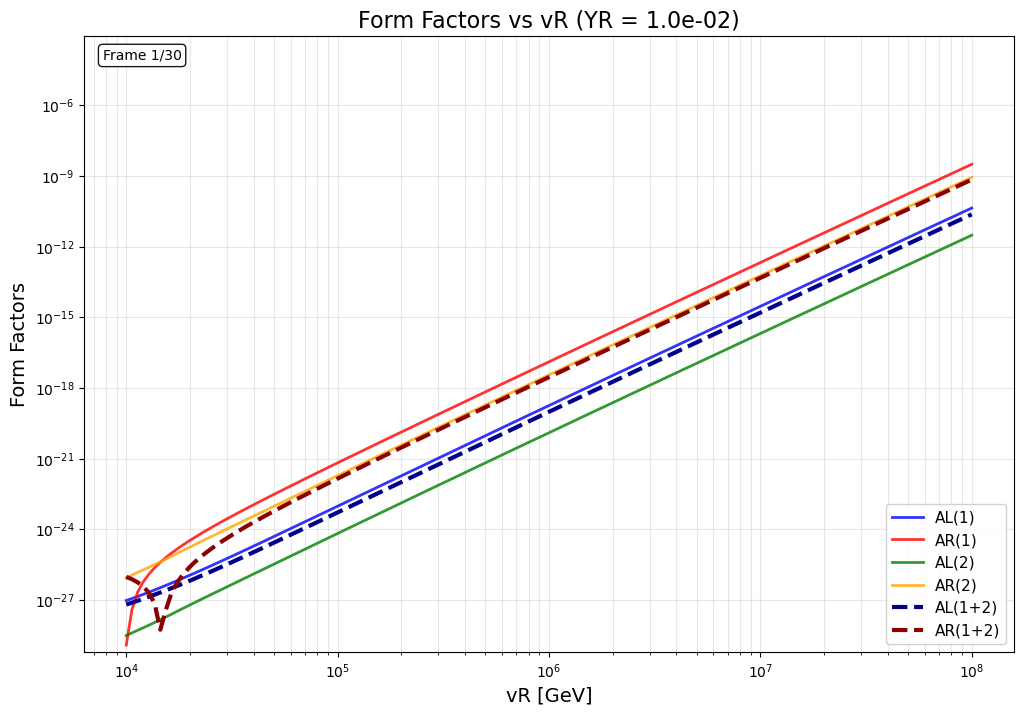

In [115]:
# Alternative: Time-based Animation of Form Factors (FIXED VERSION)
import matplotlib.animation as animation
from IPython.display import HTML
import warnings

def create_formfactor_animation(param_type='YR', save_gif=False, fix_ylim=True):
    """
    Create an animated plot showing how form factors change over time.
    
    Parameters:
    param_type: 'YR' or 'vR_range' - which parameter to animate
    save_gif: whether to save as GIF file
    fix_ylim: whether to fix y-axis limits (recommended for smoother animation)
    
    Returns:
    animation object
    """
    
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Define parameter sequences for animation
    if param_type == 'YR':
        YR_values_anim = np.logspace(-2, 2, 30)  # 30 frames
        vR_min_fixed, vR_max_fixed = 1e4, 1e8
        title_template = "Form Factors vs vR (YR = {:.1e})"
        n_frames = len(YR_values_anim)
        YR_val_fixed = None  # Will be set per frame
    elif param_type == 'vR_range':
        YR_val_fixed = 1e-9
        vR_ranges_anim = [(1e4, 1e8 * (1.5**i)) for i in range(25)]  # 25 frames
        title_template = "Form Factors vs vR (vR_max = {:.1e})"
        n_frames = len(vR_ranges_anim)
        vR_min_fixed, vR_max_fixed = None, None  # Will be set per frame
    else:
        raise ValueError(f"param_type must be 'YR' or 'vR_range', got '{param_type}'")
    
    # Pre-calculate y-axis limits if fixing them
    ylim_min, ylim_max = None, None
    if fix_ylim:
        print(f"Pre-calculating axis limits for smoother animation...")
        all_values = []
        for frame in range(min(10, n_frames)):  # Sample first 10 frames
            try:
                if param_type == 'YR':
                    YR_curr = YR_values_anim[frame]
                    vR_vals_temp = np.logspace(np.log10(vR_min_fixed), np.log10(vR_max_fixed), 100, dtype=np.float64)
                else:
                    YR_curr = YR_val_fixed
                    vR_min_temp, vR_max_temp = vR_ranges_anim[frame]
                    vR_vals_temp = np.logspace(np.log10(vR_min_temp), np.log10(vR_max_temp), 100, dtype=np.float64)
                
                ff_temp = formfactors_numpy(
                    vR_vals_temp, mn1_np, mn2_np, mn3_np, 
                    M1m_np(YR_curr, vR_vals_temp), 
                    mW1_np, mW2_np(vR_vals_temp), k1_np, muX_np, alpha23_np
                )
                all_values.extend([
                    np.abs(ff_temp[1]['AL'])**2, np.abs(ff_temp[1]['AR'])**2,
                    np.abs(ff_temp[2]['AL'])**2, np.abs(ff_temp[2]['AR'])**2
                ])
            except Exception as e:
                warnings.warn(f"Error in pre-calculation frame {frame}: {e}")
                continue
        
        if all_values:
            all_vals_concat = np.concatenate([np.ravel(v) for v in all_values])
            ylim_min = np.min(all_vals_concat[all_vals_concat > 0]) * 0.5
            ylim_max = np.max(all_vals_concat) * 2.0
            print(f"Y-axis limits: [{ylim_min:.2e}, {ylim_max:.2e}]")
    
    def animate(frame):
        """Animation function called for each frame."""
        ax.clear()
        
        try:
            # Set parameters for this frame
            if param_type == 'YR':
                YR_curr = YR_values_anim[frame]
                vR_min_curr, vR_max_curr = vR_min_fixed, vR_max_fixed
                param_val = YR_curr
            else:  # vR_range
                YR_curr = YR_val_fixed
                vR_min_curr, vR_max_curr = vR_ranges_anim[frame]
                param_val = vR_max_curr
            
            # Create vR array for this frame (use float64 for faster computation)
            vR_vals = np.logspace(np.log10(vR_min_curr), np.log10(vR_max_curr), 150, dtype=np.float64)
            
            # Calculate form factors
            formfactors = formfactors_numpy(
                vR_vals, mn1_np, mn2_np, mn3_np, 
                M1m_np(YR_curr, vR_vals), 
                mW1_np, mW2_np(vR_vals), k1_np, muX_np, alpha23_np
            )
            
            # Plot form factors
            ax.loglog(vR_vals, np.abs(formfactors[1]['AL'])**2, 
                     label='AL(1)', linewidth=2, color='blue', alpha=0.8)
            ax.loglog(vR_vals, np.abs(formfactors[1]['AR'])**2, 
                     label='AR(1)', linewidth=2, color='red', alpha=0.8)
            ax.loglog(vR_vals, np.abs(formfactors[2]['AL'])**2, 
                     label='AL(2)', linewidth=2, color='green', alpha=0.8)
            ax.loglog(vR_vals, np.abs(formfactors[2]['AR'])**2, 
                     label='AR(2)', linewidth=2, color='orange', alpha=0.8)
            ax.loglog(vR_vals, np.abs(formfactors[1]['AL'] + formfactors[2]['AL'])**2, 
                     label='AL(1+2)', linestyle='--', linewidth=3, color='darkblue')
            ax.loglog(vR_vals, np.abs(formfactors[1]['AR'] + formfactors[2]['AR'])**2, 
                     label='AR(1+2)', linestyle='--', linewidth=3, color='darkred')
            
            # Set axis labels and title
            ax.set_xlabel('vR [GeV]', fontsize=14)
            ax.set_ylabel('Form Factors', fontsize=14)
            ax.set_title(title_template.format(param_val), fontsize=16)
            
            # Fix y-axis limits if requested
            if fix_ylim and ylim_min is not None and ylim_max is not None:
                ax.set_ylim(ylim_min, ylim_max)
            
            ax.legend(fontsize=11, loc='best', framealpha=0.9)
            ax.grid(True, alpha=0.3, which='both')
            
            # Add frame counter
            ax.text(0.02, 0.98, f'Frame {frame+1}/{n_frames}', 
                   transform=ax.transAxes, fontsize=10, verticalalignment='top',
                   bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.9))
            
        except Exception as e:
            ax.text(0.5, 0.5, f'Error in frame {frame}:\n{str(e)}', 
                   transform=ax.transAxes, ha='center', va='center', fontsize=12,
                   bbox=dict(boxstyle="round,pad=0.3", facecolor="lightcoral", alpha=0.8))
            print(f"Error in frame {frame}: {e}")
    
    # Create animation
    print(f"Creating animation with {n_frames} frames...")
    anim = animation.FuncAnimation(fig, animate, frames=n_frames, interval=500, repeat=True, blit=False)
    
    if save_gif:
        filename = f'formfactors_{param_type}_animation.gif'
        print(f"Saving animation as '{filename}'... This may take a while.")
        try:
            anim.save(filename, writer='pillow', fps=2, dpi=80)
            print(f"✅ Animation saved as '{filename}'")
        except Exception as e:
            print(f"❌ Error saving animation: {e}")
            print("Tip: Make sure pillow is installed: pip install pillow")
    
    return anim

# Information and usage instructions
print("📽️ Time-based Animation Functions Available:")
print("=" * 60)
print("1. create_formfactor_animation('YR') - Animate over YR values")
print("2. create_formfactor_animation('vR_range') - Animate over vR ranges")
print("\n💡 Usage Examples:")
print("-" * 60)
print("# Display animation in notebook:")
print("# anim = create_formfactor_animation('YR')")
print("# plt.show()")
print("\n# Save animation as GIF:")
print("# anim = create_formfactor_animation('YR', save_gif=True)")
print("\n# Allow y-axis to vary (may be jumpy):")
print("# anim = create_formfactor_animation('YR', fix_ylim=False)")
print("=" * 60)

# UNCOMMENT THE LINE BELOW TO CREATE AND SAVE THE ANIMATION:
anim_YR = create_formfactor_animation('YR', save_gif=True)

## 📊 Summary: Interactive Plot vs. Time-Based Animation

You now have **two complementary approaches** for exploring form factor parameter space:

### 1. Widget-Based Interactive Plot (Cell ~944-1091)
**Best for:** Real-time exploration and parameter sensitivity analysis

**Features:**
- 🎛️ **8 adjustable parameters** with instant updates
- 📈 Real-time statistics display (min, max, mean values)
- ✅ Toggle individual form factors or combined plot
- 🔍 Logarithmic sliders for wide parameter ranges
- 📐 Customizable plot dimensions

**Usage:**
```python
# Just run the cell - widgets appear automatically
# Adjust sliders to see immediate updates
```

### 2. Time-Based Animation (Cell 1173-1338)
**Best for:** Creating videos/GIFs for presentations

**Features:**
- 🎬 **Two animation modes:**
  - `'YR'`: Sweeps YR from 10⁻¹² to 10⁻³ (50 frames)
  - `'vR_range'`: Sweeps vR maximum from 10⁴ to ~2×10⁸ (50 frames)
- 💾 Export animations as GIF files
- 📌 Fixed y-axis limits for smooth playback
- ⚡ Optimized for speed (float64 precision)

**Usage:**
```python
# Create animation (displays in notebook)
anim_YR = create_formfactor_animation('YR', save_gif=False)

# Save as GIF (requires pillow package)
anim_YR = create_formfactor_animation('YR', save_gif=True)
# Creates: formfactor_animation_YR_sweep.gif

# Sweep vR range instead
anim_vR = create_formfactor_animation('vR_range', save_gif=True)
# Creates: formfactor_animation_vR_range_sweep.gif
```

### 📦 Requirements
- **ipywidgets**: For interactive widgets (already installed ✅)
- **pillow**: For GIF export (install if needed: `pip install pillow`)

### 🎯 Which to Use?
- **Interactive widgets**: Daily analysis, parameter tuning, understanding behavior
- **Animations**: Publications, presentations, documentation

Both methods use the same underlying physics calculations (`formfactors_numpy`, `M1m_np`, `mW2_np`) and produce identical results!

In [116]:
def branching_ratio(vR, mn1=mn1_np, mn2=mn2_np, mn3=mn3_np, M1m=M1m_np(YR_np, vR_np), mW1=mW1_np, mW2=mW2_np(vR_np), k1=k1_np, muX=muX_np, alpha23=alpha23_np):

    formfactors = formfactors_numpy(vR, mn1, mn2, mn3, M1m, mW1, mW2, k1, muX, alpha23)
    AL_total_np = formfactors[1]['AL'] + formfactors[2]['AL']
    AR_total_np = formfactors[1]['AR'] + formfactors[2]['AR']

    # Calculate the branching ratio using the total form factors
    BR_h_mutau = calculate_branching_ratio_vec(AL_total_np, AR_total_np, mH10_np, ml_vals[1], ml_vals[2])

    return BR_h_mutau

In [117]:
lower_vR = 246 * 4.5 * 10**3/80.3692
lower_vR

<>:32: SyntaxWarning: invalid escape sequence '\s'
<>:32: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_23620/3295702992.py:32: SyntaxWarning: invalid escape sequence '\s'
  plt.text(1.8e4, 1e-2, '$Y_R > \sqrt{6\pi}$', color='purple', fontsize=14, ha='center')


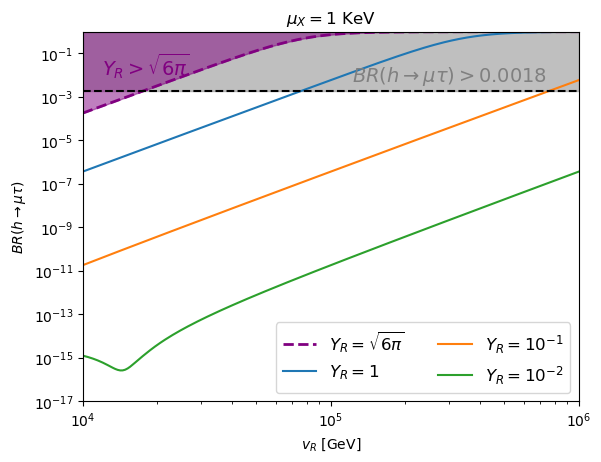

In [156]:
vR_values = np.logspace(4, 6, 200, dtype=np.float128)  # Logarithmically spaced values between 1e3 and 1e8

# Use mH10_np and ml_vals from previous cells, and ensure ml_vals is a numpy array for vectorization
mH10_np = 125
muX_np = 1e-6
BR_h_mutau_YRpertubativity = branching_ratio(vR_values, mn1_np, mn2_np, mn3_np, M1m_np(np.sqrt(6*np.pi), vR_values), mW1_np, mW2_np(vR_values), k1_np, muX_np, alpha23_np)
BR_h_mutau_YR0 = branching_ratio(vR_values, mn1_np, mn2_np, mn3_np, M1m_np(1e0, vR_values), mW1_np, mW2_np(vR_values), k1_np, muX_np, alpha23_np)
BR_h_mutau_YR1 = branching_ratio(vR_values, mn1_np, mn2_np, mn3_np, M1m_np(1e-1, vR_values), mW1_np, mW2_np(vR_values), k1_np, muX_np, alpha23_np)
BR_h_mutau_YR2 = branching_ratio(vR_values, mn1_np, mn2_np, mn3_np, M1m_np(1e-2, vR_values), mW1_np, mW2_np(vR_values), k1_np, muX_np, alpha23_np)

bound_h_mutau = 0.0018

#plt.figure(figsize=(10, 6))
plt.loglog(vR_values, BR_h_mutau_YRpertubativity, '--', color='purple', linewidth=2, label=r'$Y_R=\sqrt{6\pi}$')
plt.loglog(vR_values, BR_h_mutau_YR0, label=r'$Y_R=1$')
plt.loglog(vR_values, BR_h_mutau_YR1, label=r'$Y_R=10^{-1}$')
plt.loglog(vR_values, BR_h_mutau_YR2, label=r'$Y_R=10^{-2}$')


plt.xlabel('$v_R$ [GeV]')
plt.ylabel(r'$BR(h \to \mu \tau)$')
plt.title(r'$\mu_X = 1$ KeV')

plt.axhline(y=bound_h_mutau, color='black', linestyle='--') # label='Experimental Bound'
# dashed region over the experimental bound
plt.fill_between(vR_values, bound_h_mutau, 1, color='gray', alpha=0.5)
# text in the dashed region
plt.text(3e5, 5e-3, r'$BR(h \to \mu \tau) > 0.0018$', color='gray', fontsize=14, ha='center')

# dashed region over 1 and BR_h_mutau_YRpertubativity
plt.fill_between(vR_values, BR_h_mutau_YRpertubativity, 1, color='purple', alpha=0.5)
plt.text(1.8e4, 1e-2, '$Y_R > \sqrt{6\pi}$', color='purple', fontsize=14, ha='center')



# add excluded region for lower vR from W^\prime mass with hatching
#plt.fill_between(vR_values, 1e-40, 1, where=(vR_values < lower_vR), color='gray', alpha=0.5, hatch='//', label=r'$m_{W^\prime} > 4.5 \text{ TeV}$')

plt.xlim(vR_values.min(), vR_values.max())
plt.ylim(1e-17, 1)

plt.legend(frameon=True, fontsize=12, loc='lower right', ncol=2)
#plt.grid()
plt.savefig('BR_h_mutau_vs_vR_DLRSM.png', dpi=100)

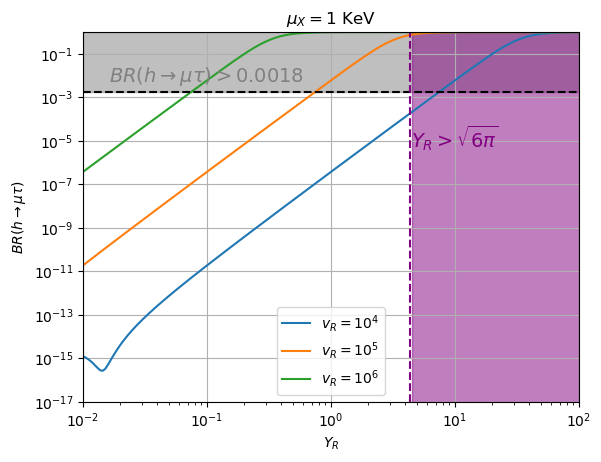

In [164]:
# Use mH10_np and ml_vals from previous cells, and ensure ml_vals is a numpy array for vectorization
mH10_np = 125
YR_values = np.logspace(-2, 2, 200, dtype=np.float128)  # Logarithmically spaced values between 1e-4 and 10^1.28
BR_h_mutau_vR4 = branching_ratio(1e4, mn1_np, mn2_np, mn3_np, M1m_np(YR_values, 1e4), mW1_np, mW2_np(1e4), k1_np, muX_np, alpha23_np)
BR_h_mutau_vR5 = branching_ratio(1e5, mn1_np, mn2_np, mn3_np, M1m_np(YR_values, 1e5), mW1_np, mW2_np(1e5), k1_np, muX_np, alpha23_np)
BR_h_mutau_vR6 = branching_ratio(1e6, mn1_np, mn2_np, mn3_np, M1m_np(YR_values, 1e6), mW1_np, mW2_np(1e6), k1_np, muX_np, alpha23_np)


plt.loglog(YR_values, BR_h_mutau_vR4, label=r'$v_R=10^4$')
plt.loglog(YR_values, BR_h_mutau_vR5, label=r'$v_R=10^5$')
plt.loglog(YR_values, BR_h_mutau_vR6, label=r'$v_R=10^6$')

plt.xlabel('$Y_R$')
plt.ylabel(r'$BR(h \to \mu \tau)$')
plt.title(r'$\mu_X = 1$ KeV')

plt.axhline(y=bound_h_mutau, color='black', linestyle='--') # label='Experimental Bound'
# dashed region over the experimental bound
plt.fill_between(YR_values, bound_h_mutau, 1, color='gray', alpha=0.5)
# text in the dashed region
plt.text(1e-1, 5e-3, r'$BR(h \to \mu \tau) > 0.0018$', color='gray', fontsize=14, ha='center')

# add perturbativity limit YR < sqrt(6pi)
plt.axvline(x=np.sqrt(6 * np.pi), color='purple', linestyle='--')
plt.text(10, 5e-6, r'$Y_R>\sqrt{6\pi}$', color='purple', fontsize=14, ha='center')
# add excluded region for YR > sqrt(6pi) with hatching
plt.fill_between(YR_values, 1e-40, 1, where=(YR_values > np.sqrt(6 * np.pi)), color='purple', alpha=0.5)

plt.xlim(YR_values.min(), YR_values.max())
plt.ylim(1e-17, 1)

plt.legend(frameon=True, fontsize=10, loc='lower center')
plt.grid()
plt.savefig('BR_h_mutau_vs_YR_DLRSM.png', dpi=100)

We have in general, the form of the $W^\prime$ mass as follows

$$m_{W^\prime}^2 = \frac{m_{W}^2}{k_1^2}\left(k_1^2 + v_R^2\right)$$

or equivalently,

$$
v_R^2 = k_1^2 \frac{m_{W^\prime}^2}{m_W^2} - k_1^2\\
 \approx k_1^2 \frac{m_{W^\prime}^2}{m_W^2}
$$
and
$$
v_R \approx k_1 \frac{m_{W^\prime}}{m_W}
$$

but $m_{W^\prime} > 3.6$ TeV then,

$$
v_R > 246 \text{ GeV} \frac{4.5 \times 10^3 \text{ GeV}}{80.3692 \text{ GeV}} = 
$$


In [165]:
YR_values = np.logspace(-2, 2, 100, dtype=np.float128)  # Logarithmically spaced values between 1e-2 and 10^2
vR_values = np.logspace(3, 8, 100, dtype=np.float128)  # Logarithmically spaced values between 1e4 and 1e8
muX_np = 1e-6
vR_grid, YR_grid = np.meshgrid(vR_values, YR_values)

# Flatten the grids for input to branching_ratio
BR_flat = branching_ratio(vR_grid.ravel(), mn1_np, mn2_np, mn3_np, M1m_np(YR_grid.ravel(), vR_grid.ravel()), mW1_np, mW2_np(vR_grid.ravel()), k1_np, muX_np, alpha23_np)
# Reshape the result back to grid shape
BR_grid = BR_flat.reshape(vR_grid.shape)

In [166]:
import matplotlib as mpl

/tmp/ipykernel_268167/1180541066.py:32: UserWarning: The following kwargs were not used by contour: 'hatch_color'
  ax.contourf(


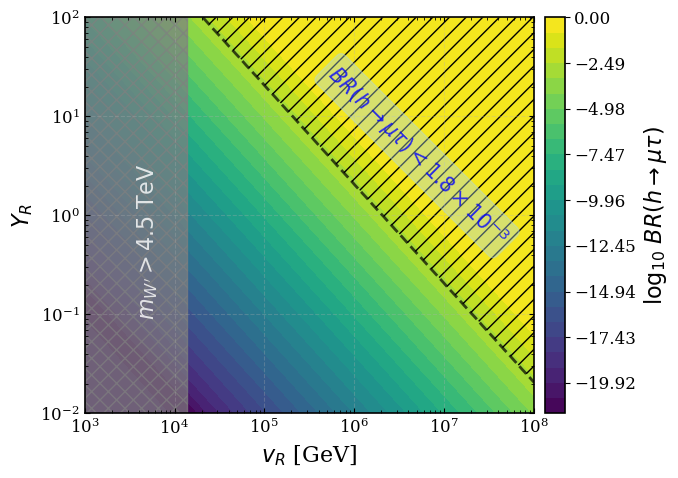

In [296]:

# Set journal style parameters
mpl.rcParams.update({
    "font.family": "serif",
    "font.size": 14,
    "axes.labelsize": 16,
    "axes.titlesize": 16,
    "legend.fontsize": 14,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "axes.linewidth": 1.2,
    "lines.linewidth": 2,
    "figure.figsize": (7, 5),
    "axes.grid": True,
    "grid.alpha": 0.3,
    "grid.linestyle": "--",
})

fig, ax = plt.subplots()

# Use log scale for both axes
log_BR = np.log10(BR_grid)
vmin = np.nanmin(log_BR[np.isfinite(log_BR)])
vmax = np.nanmax(log_BR[np.isfinite(log_BR)])
levels = np.linspace(vmin, vmax, 27)
cp = ax.contourf(vR_grid, YR_grid, log_BR, levels=levels, cmap='viridis')

cbar = fig.colorbar(cp, ax=ax, pad=0.02)
cbar.set_label(r'$\log_{10}\,BR(h\to\mu\tau)$', fontsize=16);
# add upper limit line
ax.contour(vR_grid, YR_grid, BR_grid, levels=[bound_h_mutau], colors='black', linestyles='--', alpha=0.7)
# contour region over the experimental bound (above the line) with hatching in orange color
ax.contourf(
    vR_grid, YR_grid, BR_grid, levels=[bound_h_mutau, BR_grid.max()], 
    colors='white', hatches=['//'], hatch_color='orange', alpha=0
)
# add text to the upper limit line
ax.text(
    5e6, 5e-1, r'$BR(h\to\mu\tau) < 1.8\times 10^{-3}$', 
    color='blue', fontsize=15, ha='center', rotation=-45, alpha=0.8, 
    bbox=dict(boxstyle="round,pad=0.3", edgecolor="lightblue", facecolor="lightblue", alpha=0.4)
);

# add excluded region for lower vR from W^\prime mass with hatching
ax.fill_betweenx(YR_values, 1e3, lower_vR, color='gray', alpha=0.7, hatch='xx')
# add text to the excluded region for lower vR
ax.text(5e3, 1e-1, r'$m_{W^\prime} > 4.5 \text{ TeV}$', color='white', fontsize=16, ha='center', rotation=90, alpha=0.8);

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$v_R$ [GeV]')
ax.set_ylabel(r'$Y_R$')
#ax.set_title(r'Branching Ratio $BR(h\to\mu\tau)$ Contour')

ax.tick_params(which='both', direction='in', top=True, right=True)
#ax.set_xlim(vR_values.min(), vR_values.max())
#ax.set_ylim(YR_values.min(), YR_values.max())

plt.tight_layout()
# Optional: save figure
plt.savefig('BR_vs_vR_YR_loglog_degenerate.png', dpi=300)
plt.show()

# $\mu \to e \gamma$

In [167]:
from LFVXD.diagram_meg import symbolic_formfactor_meg

In [298]:
for contribution in symbolic_formfactor_meg:
    symbolic_formfactor_meg[contribution]['sigmaL'] = symbolic_formfactor_meg[contribution]['sigmaL'].subs(
        symbolic_changes
    )
    symbolic_formfactor_meg[contribution]['sigmaR'] = symbolic_formfactor_meg[contribution]['sigmaR'].subs(
        symbolic_changes
    )

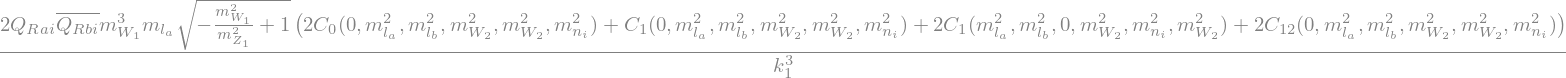

In [299]:
symbolic_formfactor_meg['W2pm']['sigmaR']

In [300]:
symbolic_formfactor_meg['W2pm']['sigmaR'].atoms(Symbol)

In [301]:
mn

## Prueba

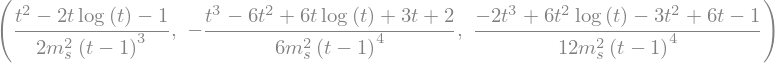

In [302]:
from sympy import log

t, ms, mf = symbols('t m_s, m_f', positive=True)

c1_lim = (t**2 - 2*t*log(t) - 1)/(2*ms**2*(t-1)**3)
c11_lim = -((t**3 - 6*t**2 + 3*t + 6*t*log(t) + 2)/(6*ms**2*(t-1)**4))
c12_lim = (-2*t**3 - 3*t**2 + 6*t**2*log(t) + 6*t - 1)/(12*ms**2*(t-1)**4)
c1_lim, c11_lim, c12_lim

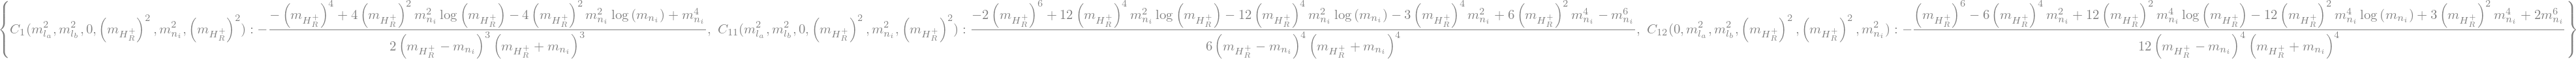

In [303]:
from LFVXD.PaVe2 import C0 as C0_sym
from LFVXD.PaVe2 import C1 as C1_sym
from LFVXD.PaVe2 import C11 as C11_sym
from LFVXD.PaVe2 import C12 as C12_sym
from LFVXD.PaVe2 import C22 as C22_sym

c_sym_approxS = lambda mS: {
    C1_sym(mla**2, mlb**2, 0, mS**2, mni**2, mS**2): c1_lim.subs(t, mni**2/mS**2).subs(ms,mS).factor(),
    C11_sym(mla**2, mlb**2, 0, mS**2, mni**2, mS**2): c11_lim.subs(t, mni**2/mS**2).subs(ms,mS).factor(),
    C12_sym(0, mla**2, mlb**2, mS**2, mS**2, mni**2): c12_lim.subs(t, mni**2/mS**2).subs(ms,mS).factor()
}
c_sym_approxS(mHR)

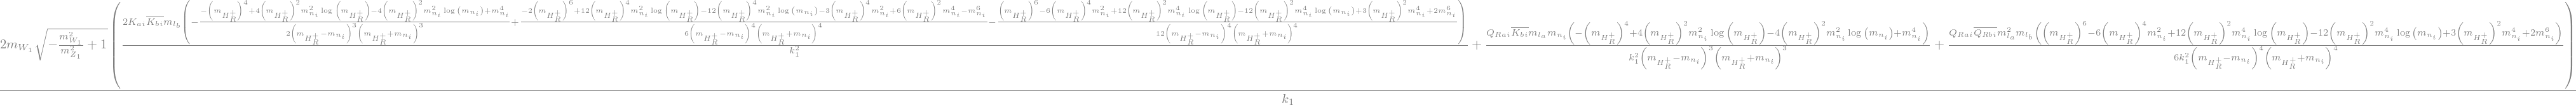

In [304]:
symbolic_formfactor_meg['HRpm']['sigmaR'].subs(c_sym_approxS(mHR))#.atoms(Symbol)

In [305]:
c0_limW = (t - t*log(t) - 1)/(ms**2*(t-1)**2)
c1_limW = (t - t*log(t) - 1)/(ms**2*(t-1)**2)
c1_limW2 = (t - t*log(t) - 1)/(ms**2*(t-1)**2)
c11_limW = -((t**3 - 6*t**2 + 3*t + 6*t*log(t) + 2)/(6*ms**2*(t-1)**4))
c12_limW = (11*t**3 - 6*t**3*log(t) - 18*t**2 + 9*t - 2)/(18*ms**2*(t-1)**4)
c22_limW = -((t**3 - 6*t**2 + 3*t + 6*t*log(t) + 2)/(6*ms**2*(t-1)**4))


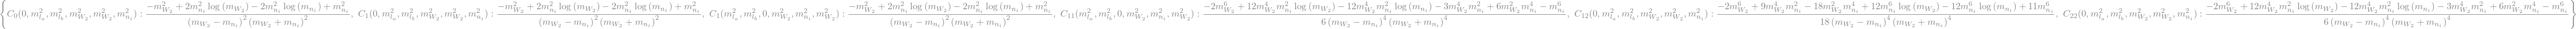

In [306]:
c_sym_approxV = lambda mV: {
    C0_sym(0, mla**2, mlb**2, mV**2, mV**2, mni**2): c0_limW.subs(t, mni**2/mV**2).subs(ms,mV).factor(),
    C1_sym(0, mla**2, mlb**2, mV**2, mV**2, mni**2): c1_limW.subs(t, mni**2/mV**2).subs(ms,mV).factor(),
    C1_sym(mla**2, mlb**2, 0, mV**2, mni**2, mV**2): c1_limW2.subs(t, mni**2/mV**2).subs(ms,mV).factor(),
    C11_sym(mla**2, mlb**2, 0, mV**2, mni**2, mV**2): c11_limW.subs(t, mni**2/mV**2).subs(ms,mV).factor(),
    C12_sym(0, mla**2, mlb**2, mV**2, mV**2, mni**2): c12_limW.subs(t, mni**2/mV**2).subs(ms,mV).factor(),
    C22_sym(0, mla**2, mlb**2, mV**2, mV**2, mni**2): c22_limW.subs(t, mni**2/mV**2).subs(ms,mV).factor()
}
c_sym_approxV(mW2)

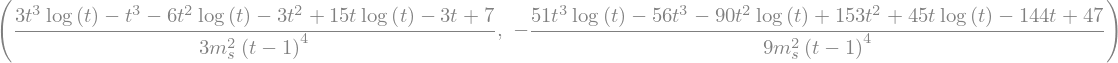

In [307]:
FloopWL = c0_limW - c1_limW - c1_limW2 - 2*c11_limW - 2*c22_limW
FloopR = 2*c0_limW + c1_limW + 2*c1_limW2 + 2*c12_limW
FloopWL.factor(), FloopR.factor()

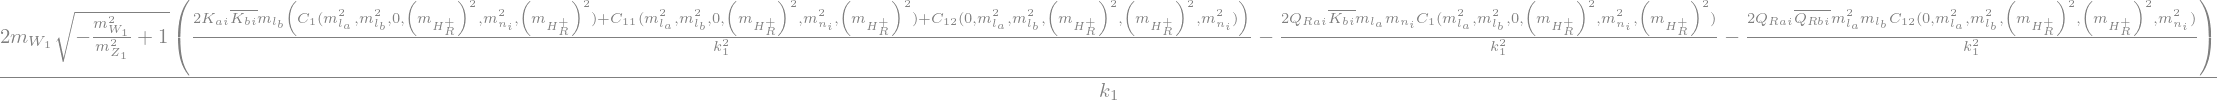

In [308]:
symbolic_formfactor_meg['HRpm']['sigmaR']#.subs(c_sym_approxV(mW2))#.atoms(Symbol)

In [309]:
contribution_mass = {
    'Wpm': mW1,
    'W2pm': mW2,
    'GLpm': mW1,
    'GRpm': mW2,
    'HRpm': mHR
}

In [310]:
mll = symbols(r'm_e m_\mu m_\tau', positive=True)
a1 = 0
b1 = 1
symbolic_formfactor_nu_sum_meg_approx = {}
for contribution, formfactor in symbolic_formfactor_meg.items():
    qL = 0
    qR = 0
    #print(f"Calculating contribution from {contribution}")
    if contribution in ['HRpm', 'GLpm', 'GRpm']:
        ffL = formfactor['sigmaL'].subs(c_sym_approxS(contribution_mass[contribution]))
        ffR = formfactor['sigmaR'].subs(c_sym_approxS(contribution_mass[contribution]))
    elif contribution in ['Wpm', 'W2pm']:
        ffL = formfactor['sigmaL'].subs(c_sym_approxV(contribution_mass[contribution]))
        ffR = formfactor['sigmaR'].subs(c_sym_approxV(contribution_mass[contribution]))
    #else:
    #    ffL = 0
    #    ffR = 0
    #    print(f"Skipping contribution from {contribution} as it is not implemented in the approximation.")
    #    continue
    
    #print(ffR)
    # sum over neutrinos
    for r in range(9):
        # changes for one neutrino in the loop
        #print(mn[r])
        one_neutrino_changes = {
            mla:mll[a1],
            mlb:mll[b1],
            mni:mn[r],
            Kai:Kmat[a1,r],
            Kbi:Kmat[b1,r],
            Kaic:conjugate(Kmat[a1,r]),
            Kbic:conjugate(Kmat[b1,r]),
            QRai:QRmat[a1,r],
            QRaic:conjugate(QRmat[a1,r]),
            QRbi:QRmat[b1,r],
            QRbic:conjugate(QRmat[b1,r]),
            QLai:QLmat[a1,r],
            QLbi:QLmat[b1,r],
            QLaic:conjugate(QLmat[a1,r]),
            QLbic:conjugate(QLmat[b1,r]),
            TRLia:TRLmat[r,a1],
            TRLib:TRLmat[r,b1],
            TRLibc:conjugate(TRLmat[r,b1]),
            TRLiac:conjugate(TRLmat[r,a1]),
            Jai:Jmat[a1,r],
            Jbi:Jmat[b1,r],
            Jaic:conjugate(Jmat[a1,r]),
            Jbic:conjugate(Jmat[b1,r])
        }
        qR += ffR.subs(one_neutrino_changes)
        qL += ffL.subs(one_neutrino_changes)
    symbolic_formfactor_nu_sum_meg_approx[contribution] = {'sigmaR':qR, 'sigmaL':qL}


In [311]:
mn1_np

In [312]:
from DLRSM1.Gauge_Higgs_senjanovic_HiggsDoublets import mZ1_sym

In [313]:
symbolic_formfactor_nu_sum_meg_approx['Wpm']['sigmaR'].subs(mNi_changes_degenerate).subs({
        mll[0]:ml_vals[0],
        mll[1]:ml_vals[1],
        mll[2]:ml_vals[2],
        mW1: mW1_val,
        mZ1_sym: 91.1876,
        k1: k1_np,
        mn[0]:mn1_np,
        mn[1]:mn2_np,
        mn[2]:mn3_np
    }).subs(Unu_changes).subs(muX, muX_np).subs(M1m, 1000).n()

In [314]:
symbolic_formfactor_nu_sum_meg_approx['HRpm']['sigmaR'].subs(mNi_changes_degenerate).subs({
        mll[0]:ml_vals[0],
        mll[1]:ml_vals[1],
        mll[2]:ml_vals[2],
        mW1: mW1_val,
        mZ1_sym: 91.1876,
        k1:k1_np,
        mn[0]:mn1_np,
        mn[1]:mn2_np,
        mn[2]:mn3_np
    }).subs(Unu_changes).subs(muX, muX_np).subs(mHR, 1e4).subs(M1m, 1000).subs(epsilon, k1_np/vR_np).n()

In [315]:
symbolic_formfactor_nu_sum_meg_approx['HRpm']#['sigmaR'].atoms(Symbol)

{'sigmaR': 4*M_{1}^-**2*m_\mu*sqrt(m_{1})*sqrt(m_{2})*m_{W_1}*sqrt(-m_{W_1}**2/m_{Z_1}**2 + 1)*(conjugate(U_{\nu}[0, 1])*conjugate(U_{\nu}[0, 2]) + conjugate(U_{\nu}[1, 1])*conjugate(U_{\nu}[1, 2]) + conjugate(U_{\nu}[2, 1])*conjugate(U_{\nu}[2, 2]))*(U_{\nu}[0, 0]*U_{\nu}[0, 2] + U_{\nu}[1, 0]*U_{\nu}[1, 2] + U_{\nu}[2, 0]*U_{\nu}[2, 2])*(-(m_{3}**4 - 4*m_{3}**2*m_{H_R^+}**2*log(m_{3}) + 4*m_{3}**2*m_{H_R^+}**2*log(m_{H_R^+}) - m_{H_R^+}**4)/(2*(-m_{3} + m_{H_R^+})**3*(m_{3} + m_{H_R^+})**3) + (-m_{3}**6 + 6*m_{3}**4*m_{H_R^+}**2 - 12*m_{3}**2*m_{H_R^+}**4*log(m_{3}) + 12*m_{3}**2*m_{H_R^+}**4*log(m_{H_R^+}) - 3*m_{3}**2*m_{H_R^+}**4 - 2*m_{H_R^+}**6)/(6*(-m_{3} + m_{H_R^+})**4*(m_{3} + m_{H_R^+})**4) - (2*m_{3}**6 - 12*m_{3}**4*m_{H_R^+}**2*log(m_{3}) + 12*m_{3}**4*m_{H_R^+}**2*log(m_{H_R^+}) + 3*m_{3}**4*m_{H_R^+}**2 - 6*m_{3}**2*m_{H_R^+}**4 + m_{H_R^+}**6)/(12*(-m_{3} + m_{H_R^+})**4*(m_{3} + m_{H_R^+})**4))/(\mu_X*k_1**3) + 4*M_{1}^-*m_\mu*sqrt(m_{1})*m_{W_1}*sqrt(-m_{W_1}**2/m_{

In [316]:
for contribution, formfactors in symbolic_formfactor_nu_sum_meg_approx.items():
    print(f"{contribution}: sigmaR has {len(formfactors['sigmaR'].atoms(Symbol))} symbols, sigmaL has {len(formfactors['sigmaL'].atoms(Symbol))} symbols")

Wpm: sigmaR has 14 symbols, sigmaL has 14 symbols
W2pm: sigmaR has 0 symbols, sigmaL has 0 symbols
GLpm: sigmaR has 15 symbols, sigmaL has 15 symbols
GRpm: sigmaR has 17 symbols, sigmaL has 17 symbols
HRpm: sigmaR has 17 symbols, sigmaL has 17 symbols


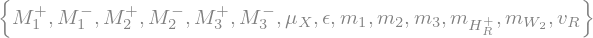

In [317]:
sigmaR_approx_total = 0
sigmaL_approx_total = 0
for contribution, formfactor in symbolic_formfactor_nu_sum_meg_approx.items():
    sigmaR_approx_total += formfactor['sigmaR']
    sigmaL_approx_total += formfactor['sigmaL']

numeric_values = {
        mll[0]:ml_vals[0],
        mll[1]:ml_vals[1],
        mll[2]:ml_vals[2],
        mW1: mW1_val,
        mZ1_sym: 91.1876,
        k1: k1_np
    }
QR_approx = sigmaR_approx_total.subs(numeric_values)
QL_approx = sigmaL_approx_total.subs(numeric_values)
QR_approx.atoms(Symbol)

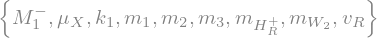

In [318]:
QR_approx.subs(mNi_changes_degenerate).subs(epsilon, k1/vR).atoms(Symbol)

In [319]:
sigmaR_lambdify_approx = lambdify(
    ( mn[0], mn[1], mn[2], M1m, mHR, mW2, k1, vR, muX), QR_approx.subs(
    mNi_changes_degenerate
    ).subs(epsilon, k1/vR).subs(Unu_changes), 
    modules=['numpy']
)
sigmaL_lambdify_approx = lambdify(
    ( mn[0], mn[1], mn[2], M1m, mHR, mW2, k1, vR, muX), QL_approx.subs(
        mNi_changes_degenerate
    ).subs(epsilon, k1/vR).subs(Unu_changes), 
    modules=['numpy']
)
sigmaR_lambdify_approx(1,2,3,4,5,6,7,8,9)

np.complex128(5.1801313609668566e-08+0j)

In [320]:
from LFVXD import mu_egamma as meg

In [321]:
def width_meg(mb, sigmaL, sigmaR):
    return meg.width_mu_to_e_gamma(mb, sigmaL, sigmaR)

width_meg = np.vectorize(width_meg)

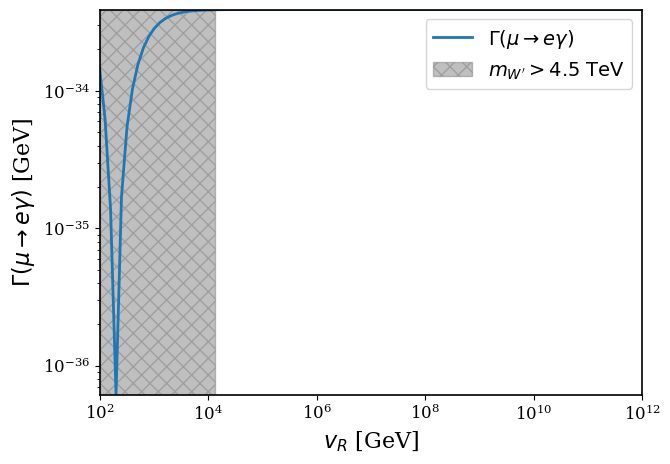

In [322]:
YR_np = 1
muX_np = 1e-3
vR_values = np.logspace(2, 12, 100, dtype=np.float128)  # Logarithmically spaced values between 1e0 and 1e12
alpha23_np = 0.1
mHR_squared_np = lambda vR: (alpha23_np)*(k1_np**2 + vR**2)
mHR_np = lambda vR: np.sqrt(mHR_squared_np(vR))
mHR_values = mHR_np(vR_values)

mW2_squared_np = lambda vR: (mW1_np**2/k1_np**2)*(k1_np**2 + vR**2)
mW2_np = lambda vR: np.sqrt(mW2_squared_np(vR))
mW2_values = mW2_np(vR_values)

M1m_np = lambda YR, vR: YR*vR/np.sqrt(2)
M1m_values = M1m_np(YR_np, vR_values)

Width_vR = width_meg(
    ml_vals[1], 
    sigmaL_lambdify_approx(mn1_np, mn2_np, mn3_np, M1m_values, mHR_values, mW2_values, k1_np, vR_values, muX_np),
    sigmaR_lambdify_approx(mn1_np, mn2_np, mn3_np, M1m_values, mHR_values, mW2_values, k1_np, vR_values, muX_np)
)
#print(Width_vR)
plt.loglog(vR_values, Width_vR, label=r'$\Gamma(\mu \to e \gamma)$')
plt.xlabel('$v_R$ [GeV]')
plt.ylabel(r'$\Gamma(\mu \to e \gamma)$ [GeV]')

# add excluded region for lower vR from W^\prime mass with hatching
wmax = Width_vR.max()
wmin = Width_vR.min()
plt.fill_between(vR_values, wmin, wmax, where=(vR_values < lower_vR), color='gray', alpha=0.5, hatch='xx', label=r'$m_{W^\prime} > 4.5 \text{ TeV}$')


plt.legend()
plt.grid()
#bound_meg = 4.2e-13 
plt.xlim(vR_values.min(), vR_values.max())
plt.ylim(wmin, wmax)
plt.show()

In [323]:
def branching_ratio_meg(mb, sigmaL, sigmaR):
    """
    Compute the branching ratio for μ → e γ given the muon mass (mb),
    and the left/right sigma form factors.
    """
    # Use the standard formula: BR = Γ(μ→eγ) / ( Γ(μ→eγ) +  Γ(μ→eνν̄) )
    # Γ(μ→eνν̄) ≈ 2.996e-19 GeV (muon invisible width)
    mu_enunu = 6.03e-8  # GeV
    width = width_meg(mb, sigmaL, sigmaR)
    return width / (width + mu_enunu)

branching_ratio_meg = np.vectorize(branching_ratio_meg)

/tmp/ipykernel_268167/4230040738.py:50: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(Bmin, Bmax)


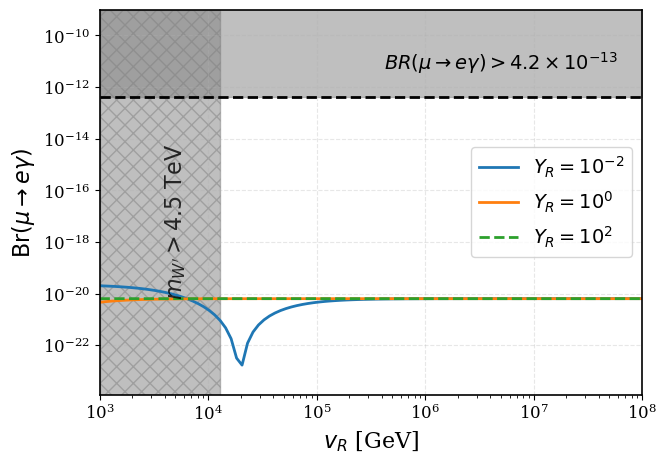

In [328]:
vR_values = np.logspace(3, 8, 100, dtype=np.float128)  # Logarithmically spaced values between 1e3 and 1e8
alpha23_np = 0.1
muX_np = 1e-6


Br_vR2m = branching_ratio_meg(
    ml_vals[1], 
    sigmaL_lambdify_approx(mn1_np, mn2_np, mn3_np, M1m_np(1e-2, vR_values), mHR_values, mW2_np(vR_values), k1_np, vR_values, muX_np),
    sigmaR_lambdify_approx(mn1_np, mn2_np, mn3_np, M1m_np(1e-2, vR_values), mHR_values, mW2_np(vR_values), k1_np, vR_values, muX_np)
)

Br_vR1 = branching_ratio_meg(
    ml_vals[1], 
    sigmaL_lambdify_approx(mn1_np, mn2_np, mn3_np, M1m_np(1, vR_values), mHR_values, mW2_np(vR_values), k1_np, vR_values, muX_np),
    sigmaR_lambdify_approx(mn1_np, mn2_np, mn3_np, M1m_np(1, vR_values), mHR_values, mW2_np(vR_values), k1_np, vR_values, muX_np)
)
Br_vR2p = branching_ratio_meg(
    ml_vals[1], 
    sigmaL_lambdify_approx(mn1_np, mn2_np, mn3_np, M1m_np(1e2, vR_values), mHR_values, mW2_np(vR_values), k1_np, vR_values, muX_np),
    sigmaR_lambdify_approx(mn1_np, mn2_np, mn3_np, M1m_np(1e2, vR_values), mHR_values, mW2_np(vR_values), k1_np, vR_values, muX_np)
)

plt.loglog(vR_values, Br_vR2m, label=r'$Y_R=10^{-2}$')
plt.loglog(vR_values, Br_vR1, label=r'$Y_R=10^{0}$')
plt.loglog(vR_values, Br_vR2p, '--', label=r'$Y_R=10^{2}$')


plt.xlabel('$v_R$ [GeV]')
plt.ylabel(r'$\text{Br}(\mu \to e \gamma)$')
#plt.title(r'Branching Ratio $\text{Br}(\mu \to e \gamma)$ vs $v_R$')

# horizontal line for experimental bound
bound_meg = 4.2e-13
plt.axhline(y=bound_meg, color='black', linestyle='--')
# dashed region over the experimental bound
plt.fill_between(vR_values, bound_meg, 1, color='gray', alpha=0.5)
# text in the dashed region
plt.text(5e6, 5e-12, r'$BR(\mu \to e \gamma)> 4.2 \times 10^{-13}$', color='black', fontsize=14, ha='center')

# add excluded region for lower vR from W^\prime mass with hatching
Bmax = Br_vR2m.max() + 1e-9
Bmin = Br_vR2p.min() - 1e-10
plt.fill_between(vR_values, Bmin, Bmax, where=(vR_values < lower_vR), color='gray', alpha=0.5, hatch='xx')
# text to the excluded region for lower vR
plt.text(5e3, 1e-20, r'$m_{W^\prime} > 4.5 \text{ TeV}$', color='black', fontsize=16, ha='center', rotation=90, alpha=0.8);

plt.legend()
plt.grid()
plt.xlim(vR_values.min(), vR_values.max())
plt.ylim(Bmin, Bmax)
plt.grid()
plt.savefig('BR_meg_vs_vR_DLRSM.png', dpi=100)
plt.show()

In [329]:
alpha23_np = 0.1
def Br_vR(vR_np, YR_np):
    mHR_squared_np = lambda vR: (alpha23_np)*(k1_np**2 + vR**2)
    mHR_np = lambda vR: np.sqrt(mHR_squared_np(vR))
    mHR_values = mHR_np(vR_np)

    mW2_squared_np = lambda vR: (mW1_np**2/k1_np**2)*(k1_np**2 + vR**2)
    mW2_np = lambda vR: np.sqrt(mW2_squared_np(vR))
    mW2_values = mW2_np(vR_np)

    M1m_np = lambda YR, vR: YR*vR/np.sqrt(2)
    M1m_values = M1m_np(YR_np, vR_np)
    #print(vR_np, YR_np, mHR_np)
    sL = sigmaL_lambdify_approx(mn1_np, mn2_np, mn3_np, M1m_values, mHR_values, mW2_values, k1_np, vR_np, muX_np)
    sR = sigmaR_lambdify_approx(mn1_np, mn2_np, mn3_np, M1m_values, mHR_values, mW2_values, k1_np, vR_np, muX_np)
    #print(sL, sR)
    Br = branching_ratio_meg(ml_vals[1], sL, sR)
    return Br

Br_vR(1e4, np.logspace(-4,2,3, dtype=np.float128))

array([2.23955032e-20, 4.68144850e-21, 6.47962067e-21], dtype=float128)

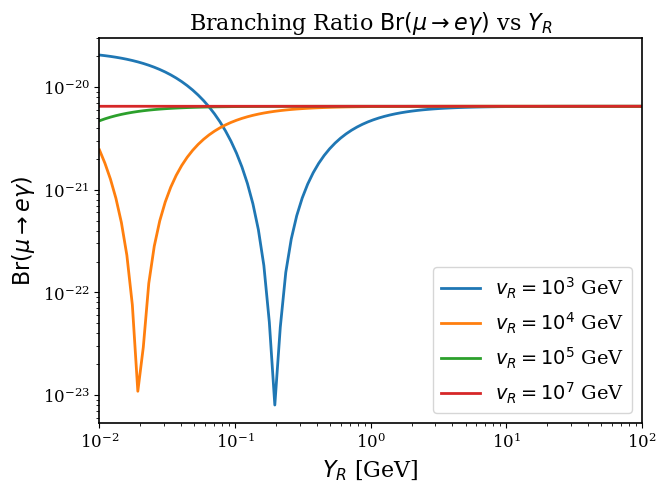

In [330]:
YR_values = np.logspace(-2, 2, 100, dtype=np.float128)

Br_vR3 = Br_vR(1e3, YR_values)
Br_vR4 = Br_vR(1e4, YR_values)
Br_vR5 = Br_vR(1e5, YR_values)
#Br_vR6 = Br_vR(1e6, YR_values)
Br_vR7 = Br_vR(1e7, YR_values)
#Br_vR8 = Br_vR(1e8, YR_values)

plt.loglog(YR_values, Br_vR3, label=r'$v_R = 10^3$ GeV')
plt.loglog(YR_values, Br_vR4, label=r'$v_R = 10^4$ GeV')
plt.loglog(YR_values, Br_vR5, label=r'$v_R = 10^5$ GeV')
#plt.loglog(YR_values, Br_vR6, label=r'$v_R = 10^6$ GeV')
plt.loglog(YR_values, Br_vR7, label=r'$v_R = 10^7$ GeV')
#plt.loglog(YR_values, Br_vR8, label=r'$v_R = 10^8$ GeV')

#meg_bound = 4.2e-13
#plt.axhline(y=meg_bound, color='black', linestyle='--', label='MEG Bound') # label='Experimental Bound'
# dashed region over the experimental bound
#plt.fill_between(YR_values, meg_bound, 1, color='gray', alpha=0.5)
# text in the dashed region
#plt.text(5e-2, 5e-12, 'Excluded', color='white', fontsize=14, ha='center')

plt.xlabel('$Y_R$ [GeV]')
plt.ylabel(r'$\text{Br}(\mu \to e \gamma)$')
plt.title(r'Branching Ratio $\text{Br}(\mu \to e \gamma)$ vs $Y_R$')
plt.legend()
plt.grid()
plt.xlim(YR_values.min(), YR_values.max())
#plt.ylim(1e-32, 1)
plt.savefig('BR_meg_vs_YR_DLRSM.png', dpi=100)

plt.show()

In [331]:
YR_values = np.logspace(-2, 2, 200)
vR_values = np.logspace(3, 8, 200)  # Logarithmically spaced values between 1e3 and 1e8

vR_grid, YR_grid = np.meshgrid(vR_values, YR_values)

BR_grid = Br_vR(vR_grid, YR_grid)

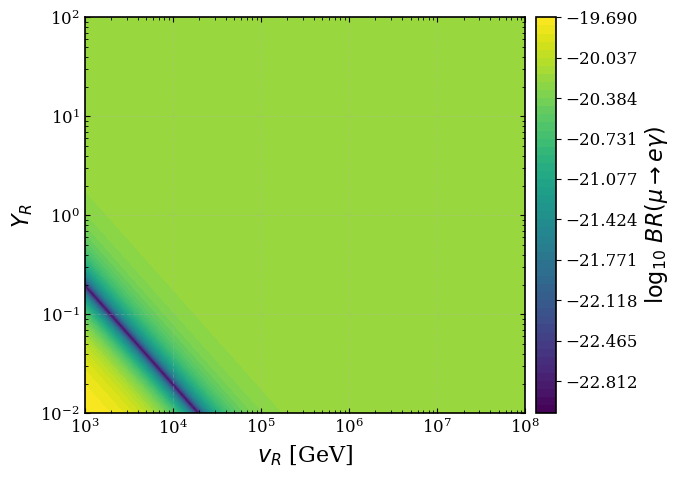

In [332]:

# Set journal style parameters
mpl.rcParams.update({
    "font.family": "serif",
    "font.size": 14,
    "axes.labelsize": 16,
    "axes.titlesize": 16,
    "legend.fontsize": 14,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "axes.linewidth": 1.2,
    "lines.linewidth": 2,
    "figure.figsize": (7, 5),
    "axes.grid": True,
    "grid.alpha": 0.3,
    "grid.linestyle": "--",
})

fig, ax = plt.subplots()

# Use log scale for both axes
log_BR = np.log10(BR_grid)
vmin = np.nanmin(log_BR[np.isfinite(log_BR)])
vmax = np.nanmax(log_BR[np.isfinite(log_BR)])
levels = np.linspace(vmin, vmax, 50)
cp = ax.contourf(vR_grid, YR_grid, log_BR, levels=levels, cmap='viridis')

cbar = fig.colorbar(cp, ax=ax, pad=0.02)
cbar.set_label(r'$\log_{10}\,BR(\mu \to e \gamma)$', fontsize=16);
# add upper limit line
meg_bound = 4.12e-13
ax.contour(
    vR_grid, YR_grid, BR_grid, levels=[meg_bound], 
    colors='black', linestyles='--', alpha=0.7
)
# contour region over the experimental bound (above the line) with hatching in orange color
if meg_bound < BR_grid.max():
    ax.contourf(
        vR_grid, YR_grid, BR_grid, levels=[meg_bound, BR_grid.max()], 
        colors='white', hatches=['//'], hatch_color='orange', alpha=0
    )
# add text to the upper limit line
#ax.text(
#    2e10, 1e-3, r'$BR(\mu \to e \gamma) < 4.12 \times 10^{-13}$', 
#    color='blue', fontsize=15, ha='center', rotation=-63, alpha=0.8, 
#    bbox=dict(boxstyle="round,pad=0.3", edgecolor="lightblue", facecolor="lightblue", alpha=0.4)
#);
# add excluded region for lower vR from W^\prime mass with hatching
#ax.fill_betweenx(YR_values, 1e3, lower_vR, color='gray', alpha=0.7, hatch='xx')
# add text to the excluded region for lower vR
#ax.text(5e3, 2e-3, r'$m_{W^\prime} > 3.6 \text{ TeV}$', color='white', fontsize=16, ha='center', rotation=90, alpha=0.8);

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$v_R$ [GeV]')
ax.set_ylabel(r'$Y_R$')
#ax.set_title(r'Branching Ratio $BR(h\to\mu\tau)$ Contour')

ax.tick_params(which='both', direction='in', top=True, right=True)
ax.set_xlim(vR_values.min(), vR_values.max())
ax.set_ylim(YR_values.min(), YR_values.max())

plt.tight_layout()
# Optional: save figure
#plt.savefig('meg_vs_vR_YR_loglog_degenerate.png', dpi=300)
plt.show()

## Suma sobre neutrinos

In [333]:
mll = symbols(r'm_e m_\mu m_\tau', positive=True)
a1 = 0
b1 = 1
symbolic_formfactor_nu_sum_meg = {}
for contribution, formfactor in symbolic_formfactor_meg.items():
    qL = 0
    qR = 0
    #print(f"Calculating contribution from {contribution}")
    for r in range(9):
        # changes for one neutrino in the loop
        #print(mn[r])
        one_neutrino_changes = {
            mla:mll[a1],
            mlb:mll[b1],
            mni:mn[r],
            Kai:Kmat[a1,r],
            Kbi:Kmat[b1,r],
            Kaic:conjugate(Kmat[a1,r]),
            Kbic:conjugate(Kmat[b1,r]),
            QRai:QRmat[a1,r],
            QRaic:conjugate(QRmat[a1,r]),
            QRbi:QRmat[b1,r],
            QRbic:conjugate(QRmat[b1,r]),
            QLai:QLmat[a1,r],
            QLbi:QLmat[b1,r],
            QLaic:conjugate(QLmat[a1,r]),
            QLbic:conjugate(QLmat[b1,r]),
            TRLia:TRLmat[r,a1],
            TRLib:TRLmat[r,b1],
            TRLibc:conjugate(TRLmat[r,b1]),
            TRLiac:conjugate(TRLmat[r,a1]),
            Jai:Jmat[a1,r],
            Jbi:Jmat[b1,r],
            Jaic:conjugate(Jmat[a1,r]),
            Jbic:conjugate(Jmat[b1,r])
        }
        qR += formfactor['sigmaR'].subs(one_neutrino_changes)
        qL += formfactor['sigmaL'].subs(one_neutrino_changes)
    symbolic_formfactor_nu_sum_meg[contribution] = {'sigmaR':qR, 'sigmaL':qL}

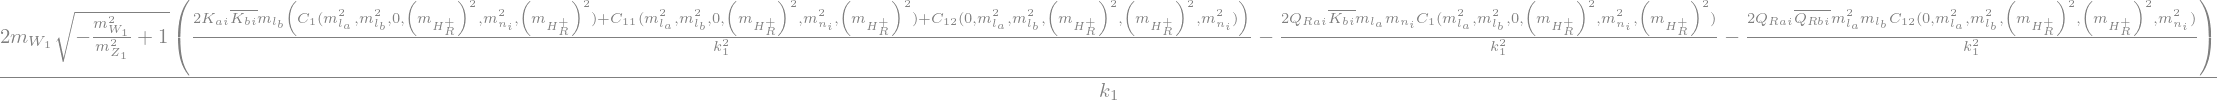

In [334]:
symbolic_formfactor_meg['HRpm']['sigmaR']

In [335]:
sigmaR_total = 0
sigmaL_total = 0
for contribution, formfactor in symbolic_formfactor_nu_sum_meg.items():
    sigmaR_total += formfactor['sigmaR']
    sigmaL_total += formfactor['sigmaL']

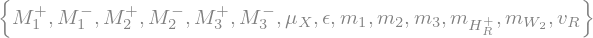

In [336]:
numeric_values = {
        mll[0]:ml_vals[0],
        mll[1]:ml_vals[1],
        mll[2]:ml_vals[2],
        mW1: mW1_val,
        mZ1_sym: 91.1876,
        k1: k1_np
    }
QR = sigmaR_total.subs(numeric_values)
QL = sigmaL_total.subs(numeric_values)
QR.atoms(Symbol)

In the limit of lepton masses equal to zero the passarino velman functions are simplifies as follows

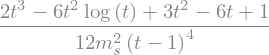

In [338]:
(c1_lim + c11_lim + c12_lim).factor()

In [339]:
c1_lim_lambda = lambdify((mf, ms), c1_lim.subs(t, mf**2/ms**2), modules='numpy')
c11_lim_lambda = lambdify((mf, ms), c11_lim.subs(t, mf**2/ms**2), modules='numpy')
c12_lim_lambda = lambdify((mf, ms), c12_lim.subs(t, mf**2/ms**2), modules='numpy')

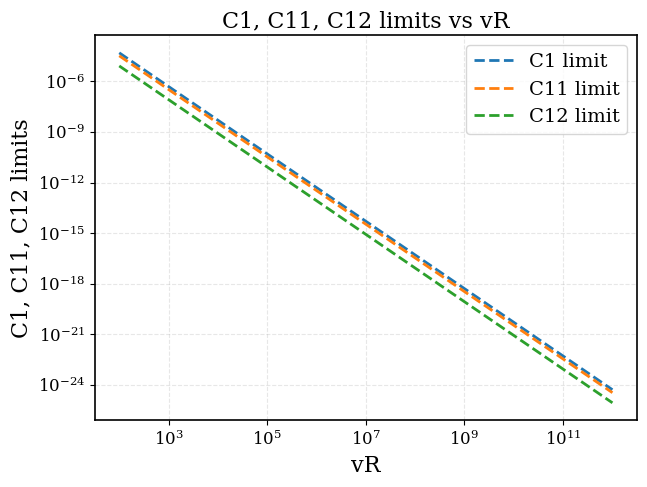

In [340]:
vR_values = np.logspace(2, 12, 100)
plt.loglog(vR_values, np.abs(c1_lim_lambda(mn1_np, vR_values)), '--', label='C1 limit')
plt.loglog(vR_values, np.abs(c11_lim_lambda(mn1_np, vR_values)), '--', label='C11 limit')
plt.loglog(vR_values, np.abs(c12_lim_lambda(mn1_np, vR_values)), '--', label='C12 limit')
plt.xlabel('vR')
plt.ylabel('C1, C11, C12 limits')
plt.title('C1, C11, C12 limits vs vR')
plt.legend()

In [341]:
from LFVXD.numeric.looptools_pv import C0, C1, C11, C12
looptools_C = {
    'C0': C0,
    'C1': C1,
    'C11': C11,
    'C12': C12
}


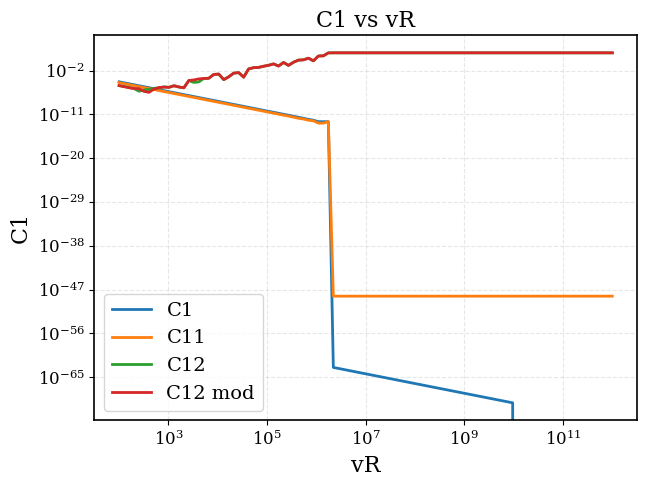

In [342]:
vR_values = np.logspace(2, 12, 100)  # Logarithmically spaced values between 1e2 and 1e12
C1_vals = C1(ml_vals[0]**2, ml_vals[1]**2, 0, vR_values**2, mn1_np**2, vR_values**2)
C11_vals = C11(ml_vals[0]**2, ml_vals[1]**2, 0, vR_values**2, mn1_np**2, vR_values**2)
C12_vals = C12(0, ml_vals[0]**2, ml_vals[1]**2, vR_values**2, vR_values**2, mn1_np**2)
C12_mod_vals = C12(ml_vals[0]**2, ml_vals[1]**2, 0, vR_values**2, mn1_np**2, vR_values**2)
plt.loglog(vR_values, np.abs(C1_vals), label='C1')
plt.loglog(vR_values, np.abs(C11_vals), label='C11')
plt.loglog(vR_values, np.abs(C12_vals), label='C12')
plt.loglog(vR_values, np.abs(C12_mod_vals), label='C12 mod')
plt.xlabel('vR')
plt.ylabel('C1')
plt.title('C1 vs vR')
plt.legend()

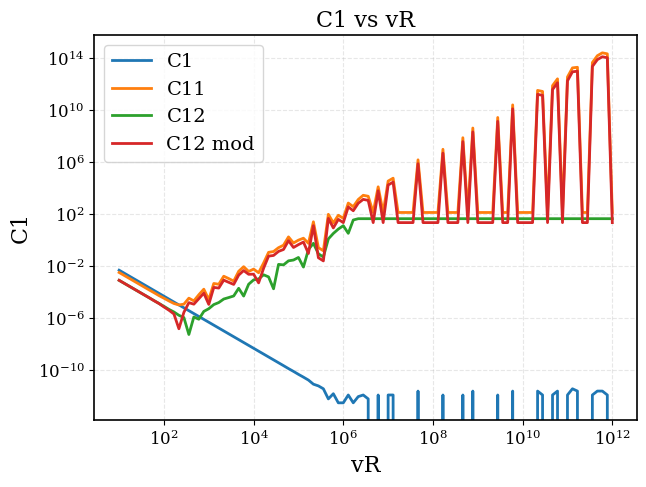

In [343]:
vR_values = np.logspace(1, 12, 100)  # Logarithmically spaced values between 1e2 and 1e12
C1_vals = C1(0, 0, ml_vals[1]**2, vR_values**2, mn1_np**2, vR_values**2)
C11_vals = C11(0, 0, ml_vals[1]**2, vR_values**2, mn1_np**2, vR_values**2)
C12_vals = C12(0, 0, ml_vals[1]**2, vR_values**2, vR_values**2, mn1_np**2)
C12_mod_vals = C12(0, 0, ml_vals[1]**2, vR_values**2, mn1_np**2, vR_values**2)
plt.loglog(vR_values, np.abs(C1_vals), label='C1')
plt.loglog(vR_values, np.abs(C11_vals), label='C11')
plt.loglog(vR_values, np.abs(C12_vals), label='C12')
plt.loglog(vR_values, np.abs(C12_mod_vals), label='C12 mod')
plt.xlabel('vR')
plt.ylabel('C1')
plt.title('C1 vs vR')
plt.legend()

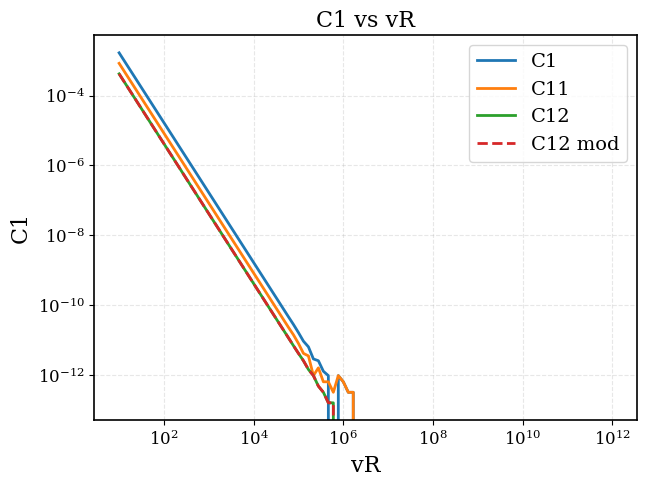

In [344]:
vR_values = np.logspace(1, 12, 100)  # Logarithmically spaced values between 1e2 and 1e12
C1_vals = C1(0, 0, ml_vals[1]**2, vR_values**2, vR_values**2, vR_values**2)
C11_vals = C11(0, 0, ml_vals[1]**2, vR_values**2, vR_values**2, vR_values**2)
C12_vals = C12(0, 0, ml_vals[1]**2, vR_values**2, vR_values**2, vR_values**2)
C12_mod_vals = C12(0, 0, ml_vals[1]**2, vR_values**2, vR_values**2, vR_values**2)
plt.loglog(vR_values, np.abs(C1_vals), label='C1')
plt.loglog(vR_values, np.abs(C11_vals), label='C11')
plt.loglog(vR_values, np.abs(C12_vals), label='C12')
plt.loglog(vR_values, np.abs(C12_mod_vals),'--', label='C12 mod')
plt.xlabel('vR')
plt.ylabel('C1')
plt.title('C1 vs vR')
plt.legend()

In [345]:
sigmaR_lambdify = lambdify(( mn[0], mn[1], mn[2], YR, vR, mHR), QR.subs(Unu_changes), modules=[pv_functions,'numpy'])
sigmaL_lambdify = lambdify(( mn[0], mn[1], mn[2], YR, vR, mHR), QL.subs(Unu_changes), modules=[pv_functions,'numpy'])

NameError: name 'YR' is not defined

In [274]:
sigmaR_lambdify(1,2,3,4,5, 6)

array([0.06615709+6.15976583e-16j])

In [275]:
sigmaR_lambdify(mn1_np, mn2_np, mn3_np, 1, 1e4, np.logspace(2,5,10))

array([ 1.85288457e-22+3.94430453e-31j,  3.97046694e-23+3.94430453e-31j,
        1.98523347e-23+3.94430453e-31j,  1.98523347e-23+3.94430453e-31j,
        1.32348898e-23+3.94430453e-31j, -1.90582413e-21+3.94430453e-31j,
       -5.92923063e-21+3.94430453e-31j,  1.69406589e-21+3.94430453e-31j,
       -1.62630326e-19+3.94430453e-31j,  2.16840434e-19+3.94430453e-31j])

In [276]:
def width_meg(mb, sigmaL, sigmaR):
    return meg.width_mu_to_e_gamma(mb, sigmaL, sigmaR)

width_meg = np.vectorize(width_meg)

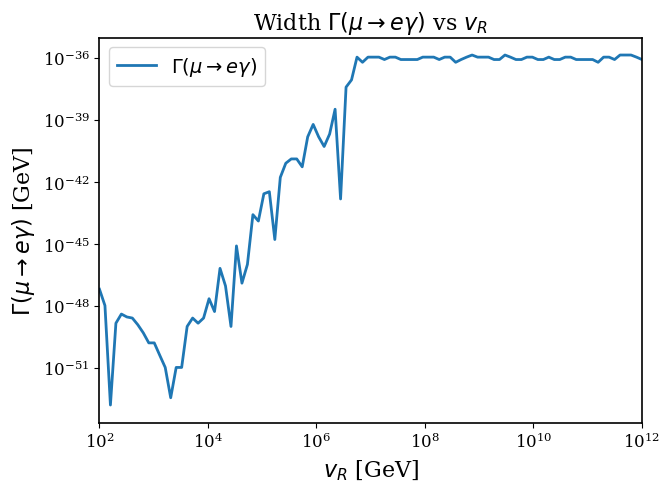

In [277]:
YR_np = 1
vR_values = np.logspace(2, 12, 100)  # Logarithmically spaced values between 1e0 and 1e12
alpha23_np = 0.1
mHR_squared_np = lambda vR: (alpha23_np)*(k1_np**2 + vR**2)
mHR_np = lambda vR: np.sqrt(mHR_squared_np(vR))
mHR_values = mHR_np(vR_values)

Width_vR = width_meg(
    ml_vals[1], 
    sigmaL_lambdify(mn1_np, mn2_np, mn3_np, YR_np, vR_values, mHR_values),
    sigmaR_lambdify(mn1_np, mn2_np, mn3_np, YR_np, vR_values, mHR_values)
)
#print(Width_vR)
plt.loglog(vR_values, Width_vR, label=r'$\Gamma(\mu \to e \gamma)$')
plt.xlabel('$v_R$ [GeV]')
plt.ylabel(r'$\Gamma(\mu \to e \gamma)$ [GeV]')
plt.title(r'Width $\Gamma(\mu \to e \gamma)$ vs $v_R$')
plt.legend()
plt.grid()
#bound_meg = 4.2e-13 
plt.xlim(vR_values.min(), vR_values.max())
#plt.ylim(1e-25, 1e-10)
plt.show()

In [278]:
def branching_ratio_meg(mb, sigmaL, sigmaR):
    """
    Compute the branching ratio for μ → e γ given the muon mass (mb),
    and the left/right sigma form factors.
    """
    # Use the standard formula: BR = Γ(μ→eγ) / Γ_total(μ)
    # Γ_total(μ) ≈ 2.996e-19 GeV (muon total width)
    mu_total_width = 2.996e-19  # GeV
    width = width_meg(mb, sigmaL, sigmaR)
    return width / mu_total_width

branching_ratio_meg = np.vectorize(branching_ratio_meg)

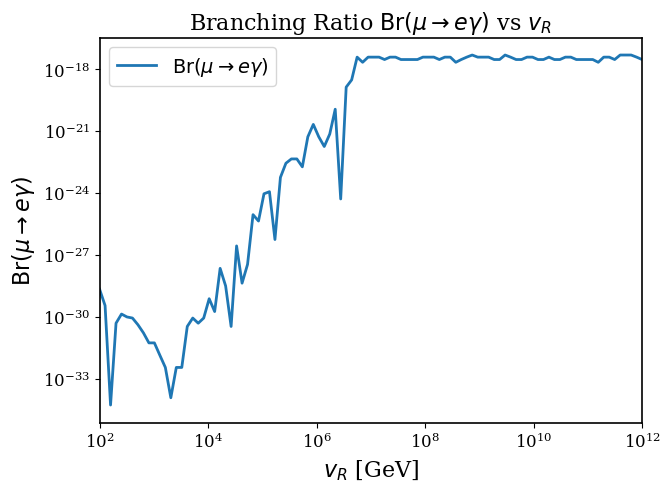

In [279]:
YR_np = 1
vR_values = np.logspace(2, 12, 100)  # Logarithmically spaced values between 1e0 and 1e12
alpha23_np = 0.1
mHR_squared_np = lambda vR: (alpha23_np)*(k1_np**2 + vR**2)
mHR_np = lambda vR: np.sqrt(mHR_squared_np(vR))
mHR_values = mHR_np(vR_values)

Br_vR = branching_ratio_meg(
    ml_vals[1], 
    sigmaL_lambdify(mn1_np, mn2_np, mn3_np, YR_np, vR_values, mHR_values),
    sigmaR_lambdify(mn1_np, mn2_np, mn3_np, YR_np, vR_values, mHR_values)
)

plt.loglog(vR_values, Br_vR, label=r'$\text{Br}(\mu \to e \gamma)$')
plt.xlabel('$v_R$ [GeV]')
plt.ylabel(r'$\text{Br}(\mu \to e \gamma)$')
plt.title(r'Branching Ratio $\text{Br}(\mu \to e \gamma)$ vs $v_R$')
plt.legend()
plt.grid()
#bound_meg = 4.2e-13 
plt.xlim(vR_values.min(), vR_values.max())
#plt.ylim(1e-25, 1e-10)
plt.show()

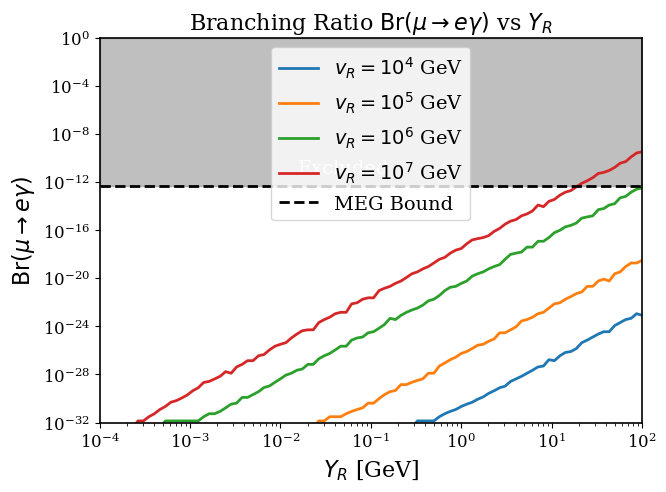

In [280]:
alpha23_np = 0.1
vR_np4 = 1e4  # Logarithmically spaced values between 1e0 and 1e12
mHR_squared_np4 = (alpha23_np)*(k1_np**2 + vR_np4**2)
mHR_np4 = np.sqrt(mHR_squared_np4)
vR_np5 = 1e5  # Logarithmically spaced values between 1e0 and 1e12
mHR_squared_np5 = (alpha23_np)*(k1_np**2 + vR_np5**2)
mHR_np5 = np.sqrt(mHR_squared_np5)
vR_np6 = 1e6  # Logarithmically spaced values between 1e0 and 1e12
mHR_squared_np6 = (alpha23_np)*(k1_np**2 + vR_np6**2)
mHR_np6 = np.sqrt(mHR_squared_np6)
vR_np7 = 1e7  # Logarithmically spaced values between 1e0 and 1e12
mHR_squared_np7 = (alpha23_np)*(k1_np**2 + vR_np7**2)
mHR_np7 = np.sqrt(mHR_squared_np7)

YR_values = np.logspace(-4, 2, 100)
Br_vR4 = branching_ratio_meg(
    ml_vals[1], 
    sigmaL_lambdify(mn1_np, mn2_np, mn3_np, YR_values, vR_np4, mHR_np4),
    sigmaR_lambdify(mn1_np, mn2_np, mn3_np, YR_values, vR_np4, mHR_np4)
)
Br_vR5 = branching_ratio_meg(
    ml_vals[1], 
    sigmaL_lambdify(mn1_np, mn2_np, mn3_np, YR_values, vR_np5, mHR_np5),
    sigmaR_lambdify(mn1_np, mn2_np, mn3_np, YR_values, vR_np5, mHR_np5)
)
Br_vR6 = branching_ratio_meg(
    ml_vals[1], 
    sigmaL_lambdify(mn1_np, mn2_np, mn3_np, YR_values, vR_np6, mHR_np6),
    sigmaR_lambdify(mn1_np, mn2_np, mn3_np, YR_values, vR_np6, mHR_np6)
)
Br_vR7 = branching_ratio_meg(
    ml_vals[1], 
    sigmaL_lambdify(mn1_np, mn2_np, mn3_np, YR_values, vR_np7, mHR_np7),
    sigmaR_lambdify(mn1_np, mn2_np, mn3_np, YR_values, vR_np7, mHR_np7)
)

plt.loglog(YR_values, Br_vR4, label=r'$v_R = 10^4$ GeV')
plt.loglog(YR_values, Br_vR5, label=r'$v_R = 10^5$ GeV')
plt.loglog(YR_values, Br_vR6, label=r'$v_R = 10^6$ GeV')
plt.loglog(YR_values, Br_vR7, label=r'$v_R = 10^7$ GeV')
meg_bound = 4.2e-13
plt.axhline(y=meg_bound, color='black', linestyle='--', label='MEG Bound') # label='Experimental Bound'
# dashed region over the experimental bound
plt.fill_between(YR_values, meg_bound, 1, color='gray', alpha=0.5)
# text in the dashed region
plt.text(5e-2, 5e-12, 'Excluded', color='white', fontsize=14, ha='center')

plt.xlabel('$Y_R$ [GeV]')
plt.ylabel(r'$\text{Br}(\mu \to e \gamma)$')
plt.title(r'Branching Ratio $\text{Br}(\mu \to e \gamma)$ vs $Y_R$')
plt.legend()
plt.grid()
plt.xlim(YR_values.min(), YR_values.max())
plt.ylim(1e-32, 1)
plt.show()

In [281]:
YR_values = np.logspace(-2, 2, 100)
vR_values = np.logspace(3, 12, 100)  # Logarithmically spaced values between 1e3 and 1e12

vR_grid, YR_grid = np.meshgrid(vR_values, YR_values)

alpha23_np = 0.1
mHR_squared_np = lambda vR: (alpha23_np)*(k1_np**2 + vR**2)
mHR_np = lambda vR: np.sqrt(mHR_squared_np(vR))

# Flatten the grids for function input
YR_flat = YR_grid.ravel()
vR_flat = vR_grid.ravel()
mHR_flat = mHR_np(vR_flat)

# Compute the branching ratio for the flattened arrays
BR_flat = branching_ratio_meg(
    ml_vals[1],
    sigmaL_lambdify(mn1_np, mn2_np, mn3_np, YR_flat, vR_flat, mHR_flat),
    sigmaR_lambdify(mn1_np, mn2_np, mn3_np, YR_flat, vR_flat, mHR_flat)
)

# Reshape the result back to the grid shape
BR_grid = BR_flat.reshape(YR_grid.shape)

In [282]:
BR_grid

array([[1.18342168e-34, 3.46561693e-33, 3.46561693e-33, ...,
        3.17473915e-26, 4.32146021e-26, 3.17465499e-26],
       [1.18342168e-34, 3.46561693e-33, 3.46561693e-33, ...,
        3.17465499e-26, 4.32146021e-26, 3.17604186e-26],
       [1.18342168e-34, 3.46561693e-33, 3.46561693e-33, ...,
        8.82112411e-26, 7.14486509e-26, 7.14452443e-26],
       ...,
       [2.03310261e-24, 1.73003170e-25, 3.53041555e-25, ...,
        1.43070758e-10, 1.94733797e-10, 9.93519981e-11],
       [2.03310261e-24, 4.27168572e-25, 5.08361866e-25, ...,
        1.94729916e-10, 3.21900474e-10, 1.43066877e-10],
       [3.61441850e-24, 3.53038989e-25, 6.91919640e-25, ...,
        2.54356639e-10, 3.21900474e-10, 3.97423516e-10]])

/tmp/ipykernel_327463/4284554448.py:35: UserWarning: The following kwargs were not used by contour: 'hatch_color'
  ax.contourf(


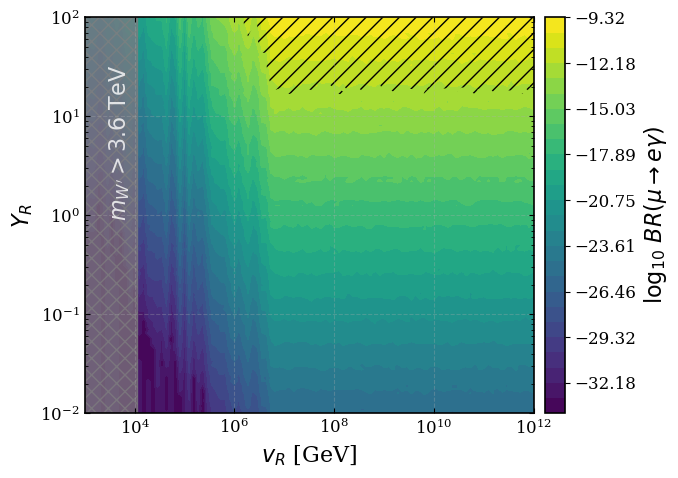

In [283]:

# Set journal style parameters
mpl.rcParams.update({
    "font.family": "serif",
    "font.size": 14,
    "axes.labelsize": 16,
    "axes.titlesize": 16,
    "legend.fontsize": 14,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "axes.linewidth": 1.2,
    "lines.linewidth": 2,
    "figure.figsize": (7, 5),
    "axes.grid": True,
    "grid.alpha": 0.3,
    "grid.linestyle": "--",
})

fig, ax = plt.subplots()

# Use log scale for both axes
log_BR = np.log10(BR_grid)
vmin = np.nanmin(log_BR[np.isfinite(log_BR)])
vmax = np.nanmax(log_BR[np.isfinite(log_BR)])
levels = np.linspace(vmin, vmax, 27)
cp = ax.contourf(vR_grid, YR_grid, log_BR, levels=levels, cmap='viridis')

cbar = fig.colorbar(cp, ax=ax, pad=0.02)
cbar.set_label(r'$\log_{10}\,BR(\mu\to e\gamma)$', fontsize=16);
# add upper limit line
ax.contour(vR_grid, YR_grid, BR_grid, levels=[bound_h_mutau], colors='black', linestyles='--', alpha=0.7)

# contour region over the experimental bound (above the line) with hatching in orange color
meg_bound = 4.2e-13
if meg_bound < BR_grid.max():
    ax.contourf(
        vR_grid, YR_grid, BR_grid, levels=[meg_bound, BR_grid.max()], 
        colors='white', hatches=['//'], hatch_color='orange', alpha=0
    )
# add text to the upper limit line
#ax.text(
#    2e10, 5e0, r'$BR(\mu\to e\gamma) < 4.2\times 10^{-13}$', 
#    color='blue', fontsize=15, ha='center', alpha=0.8, 
#    bbox=dict(boxstyle="round,pad=0.3", edgecolor="lightblue", facecolor="lightblue", alpha=0.4)
#);

# add excluded region for lower vR from W^\prime mass with hatching
ax.fill_betweenx(YR_values, 1e3, lower_vR, color='gray', alpha=0.7, hatch='xx')
# add text to the excluded region for lower vR
ax.text(5e3, 1, r'$m_{W^\prime} > 3.6 \text{ TeV}$', color='white', fontsize=16, ha='center', rotation=90, alpha=0.8);

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$v_R$ [GeV]')
ax.set_ylabel(r'$Y_R$')
#ax.set_title(r'Branching Ratio $BR(h\to\mu\tau)$ Contour')

ax.tick_params(which='both', direction='in', top=True, right=True)
ax.set_xlim(vR_values.min(), vR_values.max())
ax.set_ylim(YR_values.min(), YR_values.max())

plt.tight_layout()
# Optional: save figure
#plt.savefig('meg_vs_vR_YR_loglog_degenerate.png', dpi=300)
plt.show()

# Masses of exotic particles

Considering the definitions in the $q-\ell$ screening assumption and $Y = Y_R$, we found
$$ m_\nu = \left(\frac{k_1}{v_R}\right)^2 \mu$$

where $m_\nu$ is the light neutrino mass matrix and $\mu$ is the symmetric mass matrix of singles $S$

In [182]:
def vR_approx_mnu(mu):
    mn1_val = 1e-12 # 
    k1 = 246
    return np.sqrt(k1**2/mn1_val*mu)

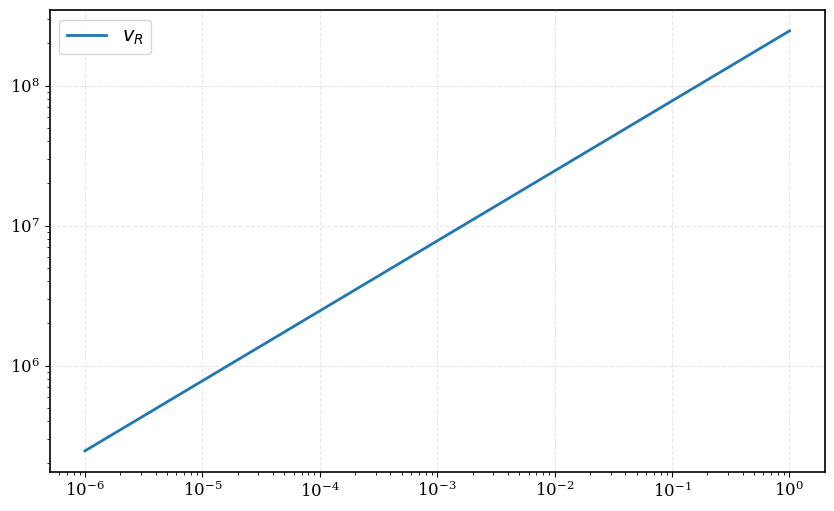

In [183]:
mu_vals = np.logspace(-6,0,100)
plt.figure(figsize=(10,6))
plt.loglog(mu_vals, vR_approx_mnu(mu_vals), label=r'$v_R$')
plt.legend()

In [184]:

def Wprime_mass(v_R, g=0.65):  # weak SU(2) gauge coupling
    return (g * v_R)/2

def Zprime_mass(mWp, thW=0.231, mW=80.379):  # thW Weinberg angle, mW mass of W boson
    cw = np.cos(thW)
    c2w = np.cos(2*thW)
    tw = np.tan(thW)
    t2w = np.tan(2*thW)
    mW2 = mWp**2*(cw**2/c2w) - mW**2*(t2w + 4)*tw**2/2
    return np.sqrt(mW2)

def HeavyNeutrino_mass(vR, YR):
    return (YR * vR)/np.sqrt(2)

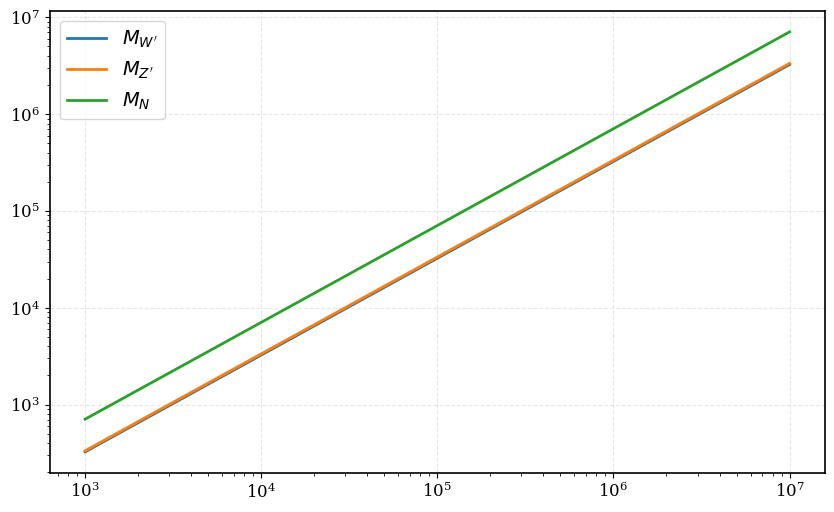

In [185]:
vR_vals = np.logspace(3,7,100)

plt.figure(figsize=(10,6))
plt.loglog(vR_vals, Wprime_mass(vR_vals), label=r'$M_{W^{\prime}}$')
plt.loglog(vR_vals, Zprime_mass(Wprime_mass(vR_vals)), label=r'$M_{Z^{\prime}}$')
plt.loglog(vR_vals, HeavyNeutrino_mass(vR_vals, 1), label=r'$M_{N}$')
plt.legend()

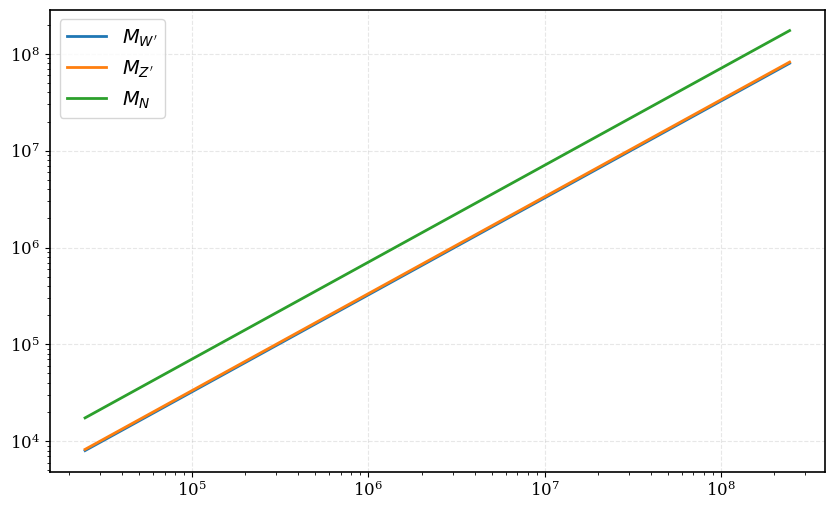

In [186]:
mu_vals = np.logspace(-8,0,100)
vR_val_mu = vR_approx_mnu(mu_vals)

plt.figure(figsize=(10,6))
plt.loglog(vR_val_mu, Wprime_mass(vR_val_mu), label=r'$M_{W^{\prime}}$')
plt.loglog(vR_val_mu, Zprime_mass(Wprime_mass(vR_val_mu)), label=r'$M_{Z^{\prime}}$')
plt.loglog(vR_val_mu, HeavyNeutrino_mass(vR_val_mu, 1), label=r'$M_{N}$')
plt.legend()



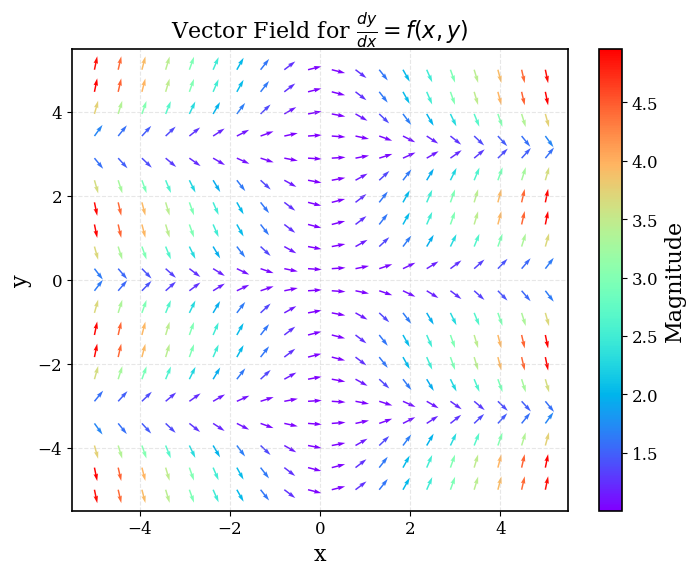

In [187]:
import numpy as np

import matplotlib.pyplot as plt

# Define the function f(x, y)
def f(x, y):
    return x*np.sin(y)  # Example: dy/dx = x - y

# Create a grid of x and y values
x = np.linspace(-5, 5, 20)
y = np.linspace(-5, 5, 20)
X, Y = np.meshgrid(x, y)

# Compute the vector field
U = 1  # dx/dx = 1 for direction along x
V = f(X, Y)  # dy/dx = f(x, y)

# Normalize arrows for better visualization
N = np.sqrt(U**2 + V**2)
U2, V2 = U/N, V/N

plt.figure(figsize=(8, 6))
plt.quiver(X, Y, U2, V2, N, cmap='rainbow')
plt.xlabel('x')
plt.ylabel('y')
plt.title(r'Vector Field for $\frac{dy}{dx} = f(x, y)$')
plt.grid(True)
plt.colorbar(label='Magnitude')
plt.show()